In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
#display(HTML("<style>.jp-RenderedText { font-family: 'Consolas'; }</style>"))
#display(HTML("<style>.jp-RenderedText, .CodeMirror { font-family: 'Consolas'; }</style>"))

C:\Users\tadje\AppData\Local\Temp\ipykernel_14616\1953496844.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [68]:
import pandas as pd
import re
city_list = pd.read_csv('../oecd_city.csv').iloc[1:,0:1]
city_list = city_list.rename(columns = {'#NAME?' : 'name'})
city_list.loc[:,'name'] = city_list['name'].apply( lambda x : x.replace(' ', ''))
city_list['name'] = city_list['name'].str.lower()
country_cities = {}
current_country = None

for ind, row in city_list.iterrows():

    if not re.search(r'\d', row['name']):
        current_country = row['name'].split(':')[1]
        country_cities[current_country] = []

    else:
        if current_country:
            city_name = row['name'].split(':')[1]
            city_name_cleaned = re.sub(r'\s*\([^)]*\)', '', city_name).strip()
            country_cities[current_country].append(city_name_cleaned)

countries = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", "Australia",
    "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin",
    "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria", "Burkina Faso", "Burundi",
    "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia",
    "Comoros", "Congo", "Costa Rica", "Cote d'Ivoire", "Croatia",
    "Cuba", "Cyprus", "Czech Republic", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "Ecuador", "Egypt",
    "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland", "France",
    "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau",
    "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel",
    "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "southkorea", "Kosovo",
    "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania",
    "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania",
    "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia", "Montenegro", "Morocco", "Mozambique",
    "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia",
    "Norway", "Oman", "Pakistan", "Palau", "Palestine", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines",
    "Poland", "Portugal", "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines",
    "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone",
    "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Sudan", "Spain", "Sri Lanka",
    "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan", "Tanzania", "Thailand", "Timor-Leste",
    "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine",
    "u.a.e", "United Kingdom", "United States", "Uruguay", "Uzbekistan", "Vanuatu", "Vatican City",
    "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe",\
    'us', 'puertorico', 'türkiye', 'usa',\
    'hongkong'
]


countries = list(map(lambda x : x.replace(' ', ''), countries))
countries = [country.lower() for country in countries]

pattern_updated = '|'.join([f'\\b{country}\\b|{country}$' for country in countries])
pattern2 = r'[A-Za-z]{2}\d{5}$'
pattern3 = r'salem|ny|nevada|ohio|kansascity|chulavista|wichita|oh44483|keshena|andersenafb|goleta|cincinnati'
pattern4 = r'madurai|mumbai|ludhiana|bangalore'
pattern5 = r'medellin'
pattern6 = r'macedonia'
pattern7 = r'charlestown'
pattern8 = r'上海'

def classify_country(x):
    if re.search(pattern3, x, re.IGNORECASE):
        return 'unitedstates'
    elif re.search(pattern4, x, re.IGNORECASE):
        return 'india'
    elif re.search(pattern5, x, re.IGNORECASE):
        return 'colombia'
    elif re.search(pattern6, x, re.IGNORECASE):
        return 'northmacedonia'
    elif re.search(pattern7, x, re.IGNORECASE):
        return 'saintkittsandnevis'
    elif re.search(pattern8, x, re.IGNORECASE):
        return 'china'
    else:
        return x


country_patterns = {country: '|'.join(map(re.escape, cities)) for country, cities in country_cities.items()}

def classify_country2(sentence):
    for country, pattern in country_patterns.items():
        if re.search(pattern, sentence, re.IGNORECASE):
            return country
    return sentence

final_map = {'us' : 'unitedstates', 'usa' : 'unitedstates', 'korea' : 'southkorea', 'tã¼rkiye': 'turkey', 'czechia' : 'czechrepublic',
            'slovakia' :'slovakrepublic', 'türkiye' :'turkey'}

In [69]:
import pandas as pd
import re
from sklearn.base import BaseEstimator, TransformerMixin

class MyTrnasformer(BaseEstimator, TransformerMixin):
    def __init__(self, pattern_updated, pattern2, classify_country, classify_country2, final_map, countires):
        self.pattern_updated = pattern_updated
        self.pattern2 = pattern2
        self.classify_country = classify_country
        self.classify_country2 = classify_country2
        self.final_map = final_map
        self.countries = countries

        self.bins = [0, 0.1, 0.15, 0.25, 0.35, 0.49, 1.0]
        self.labels = [1, 2, 3, 4, 5, 6]
        self.customer_country_category = None

        self.similar_categories_mapping = {
                'quotation_or_purchase_consultation': 'quotation or purchase consultation',
                'technical consultation': 'technical support',
                'technical': 'technical support',
                'sales': 'sales inquiry'
            }

        self.position_mapping = {
            'ceo/founder': 'CEO/Founder', 'founder': 'CEO/Founder', 'chief executive officer': 'CEO/Founder',
            'ceo/fundador': 'CEO/Founder', 'the big boss': 'CEO/Founder',
            'vice president': 'Vice President', 'vicepresident': 'Vice President', 'vp': 'Vice President',
            'c-level executive': 'C-Level Executive', 'c-levelexecutive': 'C-Level Executive',
            'leadership/executive office/owner': 'C-Level Executive',
            'director': 'Director', 'business unit director': 'Director',
            'associate/analyst': 'Associate/Analyst', 'associate professor': 'Associate/Analyst',
            'assistant professor': 'Associate/Analyst', 'asst prof.': 'Associate/Analyst',
            'entry level': 'Entry Level', 'entrylevel': 'Entry Level',
            'manager': 'Manager', 'gerente': 'Manager',
            'consultant': 'Consultant', 'commercial consultant': 'Consultant',
            'architecture/consult': 'Consultant', 'architect/consultant': 'Consultant',

            'teacher': 'Education Professional', 'educator': 'Education Professional',
            'professor': 'Education Professional', 'physics teacher': 'Education Professional',
            'maths lecturer': 'Education Professional', 'quantitative aptitude faculty': 'Education Professional',
            'english trainer for ielts,toefl,pte,gre,sat exams.': 'Education Professional', 'pgt physics': 'Education Professional',
            'chemistry teacher': 'Education Professional', 'math and physics teacher': 'Education Professional',
            'assistant professor of enlish': 'Education Professional', 'professor of mathematics': 'Education Professional',
            'physics and mathematics teacher': 'Education Professional',
            # 기타 분류
            'other': 'other', 'others': 'other', 'not applicable': 'other', 'other - please specify - cedia association': 'other'

            }


        self.timeline_mapping = {
                # 시간 프레임 관련 값
                'less than 3 months': 'less than 3 months',
                '3 months ~ 6 months': '3 to 6 months',
                '6 months ~ 9 months': '6 to 9 months',
                '9 months ~ 1 year': '9 months to 1 year',
                'more than a year': 'more than a year',
                'less than 6 months': 'less than 6 months',
                '3_months_~_6_months': '3 to 6 months',
                'less_than_3_months': 'less than 3 months',
                '6_months_~_9_months': '6 to 9 months',
                '9_months_~_1_year': '9 months to 1 year',
                'more_than_a_year': 'more than a year',

                # 상황 설명 값
                'quote has been sent to customer.': 'quote sent',
                'client not interested in product..': 'client not interested',
                'being followed up': 'being followed up',
                'update- 7th aug--demo given. customer will confirm next week': 'demo given - follow up',
                'details send': 'details sent',
                'requires detail for tender. no purchase requirement right now.': 'details required for tender',
                'the client is not having any requirement hence closig in system.': 'client has no requirement',
                'discussed with client details mailed.': 'details mailed to client',
                'he is looking for video wall & idb for his office.': 'looking for specific products',
                'details shared': 'details shared',
                'demo to be aligned': 'demo to be scheduled',
                'update- 13th spet--follow up to be done on 15th sept': 'follow up scheduled',
                'partner is already in touch with our rd, orno.': 'partner in touch with representative',
                'rnr': 'no response received',
                'scheduling a meeting': 'meeting scheduled',
                'customer want demo of idb.': 'customer wants demo',
                'already shared quotation through si.': 'quotation shared',
                'quotation shared.': 'quotation shared',
                'duplicate lead': 'duplicate lead',
                'invalid lead': 'invalid lead',
                'demo scheduled for first week feb': 'demo scheduled',
                'forwarded to bdo, being followed up': 'being followed up by business development officer',
                'spoke with custome he want 43" tv': 'customer wants specific product',
                'don’t have budget': 'no budget',
                'client shall get back for exploring demo of idb': 'client will get back regarding demo',
                'already in discussion with partner from bangalore': 'in discussion with partner',
                'require demo price send': 'demo and price inquiry',
                'size not available': 'specific size not available',
                'eol model new model quote requirment after 30 days.': 'end of life model, new model required after 30 days',
                'need to discuss with client in next two months.': 'discussion planned with client',
                'spoken to client, he will check if they need demo and confirm': 'client will confirm about demo',
                '29thsep2021:-no such requirement as of now': 'no requirement as of now',
                'purchase planning after 3 months': 'planning to purchase after 3 months',
                '09-02-2022 requested for boq of requirement': 'bill of quantities requested',
                'converted this lead into opportunity.': 'lead converted into opportunity',
                'demo scheduled for 24th oct': 'demo scheduled',
                'discussed with client. we need to align demo.': 'discussion with client about demo',
                'require demo': 'demo required',
                'client is looking for 86" display with vc solution': 'client looking for specific display with solution',
                'quote sent to customer.': 'quote sent to customer',
                'under discussion': 'under discussion',
                'meeting planned for further discussion': 'meeting planned',
                'customer will come for demo in next week': 'customer will come for demo',
                'he want demo next week': 'demo requested next week',
                'call and discused to custome customer wants demo.': 'customer wants demo, discussed over call',
                'demo planned, will update further status once its completed': 'demo planned and update pending',
                'quote sent, the client is required demo in june': 'quote and demo scheduled in june',
                'will come for the demo': 'client will come for demo',
                'customer has not answering call': 'customer not answering'
            }
        
        self.dict_inquiry_type = None
        self.dict_customer_type = None
        self.dict_customer_job = None
        self.dict_product_category = None
        self.dict_customer_position = None
        self.dict_expected_timeline = None
        
    
    def fit(self, X, y=None):
        df_train = X.copy()
        
        #inquiry_type
        similar_categories = ['others', 'other_', 'etc.']
        df_train['inquiry_type'].replace(similar_categories, 'other', inplace=True)
        df_train['inquiry_type'] = df_train['inquiry_type'].str.lower()
        similar_categories_mapping = {
            'quotation_or_purchase_consultation': 'quotation or purchase consultation',
            'technical consultation': 'technical support',
            'technical': 'technical support',
            'sales': 'sales inquiry'
        }
        df_train['inquiry_type'] = df_train['inquiry_type'].replace(similar_categories_mapping)
        Y = df_train.copy()
        
        category_counts = df_train['inquiry_type'].value_counts()
        categories_to_remove = category_counts[category_counts <= 100].index
        df_train.loc[df_train['inquiry_type'].isin(categories_to_remove), 'inquiry_type'] = 'undefined'
             
        self.dict_inquiry_type = dict(zip(Y['inquiry_type'], df_train['inquiry_type']))  # 기존 : 최종
        
        #customer_type
        
        df_train['customer_type'] = df_train['customer_type'].str.lower()
        df_train['customer_type'] = df_train['customer_type'].str.replace(' ', '')
        df_train['customer_type'] = df_train['customer_type'].str.replace('/', '')
        df_train['customer_type'] = df_train['customer_type'].str.replace('//', '/')
        df_train['customer_type'] = df_train['customer_type'].str.replace('_', '')
        df_train['customer_type'] = df_train['customer_type'].str.replace('-', '')
        df_train['customer_type'] = df_train['customer_type'].str.replace(r'/$', '', regex=True)
        df_train['customer_type'] = df_train['customer_type'].str.replace(r'^/', '', regex=True)
        
        Y = df_train.copy()
        
        category_counts = df_train['customer_type'].value_counts()
        categories_to_remove = category_counts[category_counts <= 100].index
        df_train.loc[df_train['customer_type'].isin(categories_to_remove), 'customer_type'] = 'undefined'
            
        self.dict_customer_type = dict(zip(Y['customer_type'], df_train['customer_type']))  # 기존 : 최종
        
        #customer_job
        df_train['customer_job'] = df_train['customer_job'].str.lower()
        df_train['customer_job'] = df_train['customer_job'].str.replace(' ', '')
        df_train['customer_job'] = df_train['customer_job'].str.replace('/', '')
        df_train['customer_job'] = df_train['customer_job'].str.replace('//', '/')
        df_train['customer_job'] = df_train['customer_job'].str.replace('_', '')
        df_train['customer_job'] = df_train['customer_job'].str.replace('-', '')
        df_train['customer_job'] = df_train['customer_job'].str.replace(r'/$', '', regex=True)
        df_train['customer_job'] = df_train['customer_job'].str.replace(r'^/', '', regex=True)
        
        df_train['customer_job'] = df_train['customer_job'].replace('others', 'other')
        df_train['customer_job'] = df_train['customer_job'].replace('accountedf_trainec/manager', 'accountmanagement')
        df_train['customer_job'] = df_train['customer_job'].replace('accountspayable', 'accounting')
        specific_values = ['admin', 'administración', 'administration', 'administrative', 'adminisztráció', 'amministrativo',
                           'imagingadministrator', 'itadmin', 'itadministrator', 'networkadministrator', 'pacsadministrator',
                           'platformadministrator', 'systemsadministrator']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'admin' if df_train in specific_values else df_train)

        #4.
        df_train['customer_job'] = df_train['customer_job'].replace('administrativeassistant', 'adminassistant')

        #5.
        df_train['customer_job'] = df_train['customer_job'].replace('advertisingandpromotionsteam', 'advertising')
        df_train['customer_job'] = df_train['customer_job'].replace('storepromotions', 'advertising')
        df_train['customer_job'] = df_train['customer_job'].replace('tradeshowevent', 'advertising')

        #6.
        specific_values2 = ['architect', 'architect/owner', 'architectassinteriores', 'arquitecto/consultor', 'projectarchitect']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'architect' if df_train in specific_values2 else df_train)

        #7.
        specific_values3 = ['artanddesign','arte_e_design', 'arteydiseño','artist,leadonequipmentselection', 'arts_and_design', 'artsanddesign']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'artist' if df_train in specific_values3 else df_train)

        #8.
        specific_values4 = ['assistinservingfood', 'serving', 'servingfood', 'servingrobot', 'waiter']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'serving' if df_train in specific_values4 else df_train)

        #9.
        specific_values5 = ['a/vprojectmanager', 'avestimator', 'avprojectmanager', 'avtech', 'avtechnician']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'avtechnician' if df_train in specific_values5 else df_train)

        #10.
        specific_values6 = ['authorize(youareresponsibleformakingthefinaldecision)', 'purchasingauthority']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'authorizer' if df_train in specific_values6 else df_train)

        #11.
        df_train['customer_job'] = df_train['customer_job'].replace('publicbidder', 'bidder')

        #12.
        specific_values7 = ['business_development', 'businessdevelopment']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'businessdevelopment' if df_train in specific_values7 else df_train)

        #13.
        specific_values8 = ['cctvmonetoring', 'cctvview']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'cctvoperator' if df_train in specific_values8 else df_train)

        #14.
        specific_values9 = ['ceo', 'ceo/founder', 'chief', 'cleveledf_trainecutive', 'coo', 'decider', 'decisionmaker',
                            'finalapproval', 'head', 'president', 'presidentforsennco', 'thebigboss', 'underboss',
                            'vicepresident', 'vp/gm']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'chief' if df_train in specific_values9 else df_train)

        #15.
        specific_values10 = ['chiefeng', 'chiefengineer', 'chiefofengineering']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'chiefengineer' if df_train in specific_values10 else df_train)

        #16.
        specific_values11 = ['chirurgien', 'cirugano', 'doctor', 'főorvos',  'profesionaldecirugía', 'surgeryprofessional',
                             'surgeryprofessional\u200b']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'doctor' if df_train in specific_values11 else df_train)

        #17.
        specific_values12 = ['contractor', 'cintractor', 'managingcontractor']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'contractor' if df_train in specific_values12 else df_train)

        #18.
        specific_values13 = ['consultant', 'consultant,cabinetfabricator', 'consultant/purchaser', 'consultent', 'consulting']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'consultant' if df_train in specific_values13 else df_train)

        #19.
        specific_values14 = ['coordinator', 'corporate/office', 'correspondence', 'costaravteam']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'corporate' if df_train in specific_values14 else df_train)

        #20.
        specific_values15 = ['contentcreation,eqconsultant', 'creativedirector']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'creator' if df_train in specific_values15 else df_train)

        #21.
        specific_values16 = ['design', 'design/build', 'design/purchaser', 'designandprovideequipment', 'designer',
                             'designer,creativetechnologist', 'designer,producer', 'designers', 'designere/budget',
                             'designerpurchaser', 'design/purchaser', 'graphicdesign', 'kreation_und_design',
                             'kreationunddesign', 'művészet_és_design']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'designer' if df_train in specific_values16 else df_train)

        #22.
        specific_values17 = ['design/insttrain/training/support', 'designandinsttrain', 'designandinsttrainationcompany', 'designer/insttrainer']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'designinsttrainer' if df_train in specific_values17 else df_train)

        #23.
        specific_values18 = ['designengineer', 'designer/engineer']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'designengineer' if df_train in specific_values18 else df_train)

        #24.
        specific_values19 = ['desicionmaker', 'design/decisionmaker', 'generalmanager(decisionmaker)', 'technical/decisionmaker']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'decisionmaker' if df_train in specific_values19 else df_train)

        #25.
        specific_values20 = ['designer/pm/gc', 'designer/projectmanager']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'desingpm' if df_train in specific_values20 else df_train)

        #26.
        specific_values21 = ['developer', 'developer/property', 'softwaredeveloper']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'developer' if df_train in specific_values21 else df_train)

        #27.
        specific_values22 = ['digitaldisplayvssignageneed', 'digitalsignage']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'digitalsignage' if df_train in specific_values22 else df_train)

        #28.
        specific_values23 = ['directeurtechnique', 'director', 'director,it', 'directorcomercial',
                             'directorit', 'directorofengineering', 'directoroffinance', 'directorofit',
                             'directoroflodging','directorofoperations', 'directorpurchaser', 'engineeringdirector',
                             'f&bdirectorforbicyclecasino', "i'mdirectingit", 'itdairector',  'itdirector',  'managingdirector',
                             'overseer',  'projectdirector', 'purchasingdirector', 'supervisor', 'technicaldirector']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'director' if df_train in specific_values23 else df_train)

        #29.
        specific_values24 = ['distribuidor', 'distributor', 'distributorquotation']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'distributor' if df_train in specific_values24 else df_train)

        #30.
        specific_values25 = ['education', 'educator', 'highereducation(college&university)', 'institute&academy']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'educator' if df_train in specific_values25 else df_train)

        #31.
        specific_values26 = ['engineer', 'engineering', 'engineering&technical', 'engineering,design,andinsttrain',
                             'hardwaredesignengineer', 'projectengineer', 'principalengineer', 'seniordesignengineer',
                             'systemengineer', 'systemsengineer']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'engineer' if df_train in specific_values26 else df_train)

        #32.
        specific_values27 = ['engagementedf_trainecutive', 'engineering&technicaledf_trainecutive', 'edf_trainecutive', 'edf_trainecution',
                             'marketingedf_trainecutive', 'financeedf_trainecutive', 'operationsedf_trainecutive', 'principal',  'principalincharge',
                             'salesedf_trainecutive']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'edf_trainecutive' if df_train in specific_values27 else df_train)

        #33.
        specific_values28 = ['eventmarketing', 'fieldmarketing', 'marketing', 'marketingcoordinator',
                             'marketingoperations', 'productmarketing', 'technicalmarketing']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'marketing' if df_train in specific_values28 else df_train)

        #34.
        specific_values29 = ['equipmentandappprovider', 'equipmentcustodian', 'equipmentplanner', 'equipmentselection']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'equipment' if df_train in specific_values29 else df_train)

        #35.
        specific_values30 = ['facilitator', 'facilitatorinsttrainationservices', 'facilities', 'facilitiesandoperations',
                             'facilityadministrator', 'facilitymanager']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'facilitator' if df_train in specific_values30 else df_train)

        #36.
        specific_values31 = ['field/outsidesales', 'sale', 'sales', 'salesman', 'salesmanager',
                             'salesoperations', 'technicalsales', 'salesrep', 'salesengineering', 'sellerinsttrainer',
                             'vendite', 'vertrieb', 'értékesítés']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'sales' if df_train in specific_values31 else df_train)

        #37.
        specific_values32 = ['finance', 'finanzas', 'finanzen', 'pénzügy']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'finance' if df_train in specific_values32 else df_train)

        #38.
        specific_values33 = ['gc', 'generalcontractor']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'generalcontractor' if df_train in specific_values33 else df_train)

        #39.
        specific_values34 = ['genelmüdür', 'generalmanagement', 'generalmanager', 'generalmanagerpurchaser', 'generamanager',
                             'globtraineadofproduction','gm', 'gm/partowner']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'generalmanager' if df_train in specific_values34 else df_train)

        #40.
        specific_values35 = ['generalmanagerprojectmanager', 'gestión_de_proyectos']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'generalprojectmanager' if df_train in specific_values35 else df_train)

        #41.
        specific_values36 = ['hr','human_resources', 'humanresources', 'hrposting']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'humanresource' if df_train in specific_values36 else df_train)

        #42.
        specific_values37 = ['healthcare_services', 'healthcareprofessionals', 'healthcareservices', 'mentalhealth']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'healthcare' if df_train in specific_values37 else df_train)

        #43.
        specific_values38 = ['helpdesk/desktopservices', 'helpdeskspecialist']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'helpdesk' if df_train in specific_values38 else df_train)

        #44.
        specific_values39 = ['implement', 'informatics,touchcapability', 'information_technology', 'informationtechnology',
                             'informationtechnology\u200b', 'it', 'it/software', 'itdepartment', 'ittech', 'itsupport',
                             'itspecialist', 'itintegrator', 'ithardwaretechnician', 'itinformationtechnology', 'officeit']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'it' if df_train in specific_values39 else df_train)

        #45.
        specific_values40 = ['insttrainationandpurchaser', 'insttrainer', 'insttrainer/salesrep', 'insttrainer/systemintegrater',
                             'postinsttrainsupportandservice',  'planningandinsttraination', 'systeminsttrainer']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'insttrain' if df_train in specific_values40 else df_train)

        #46.
        specific_values41 = ['integrador', 'integration', 'integrator', 'intergrator', 'si', 'specifier/integrator',
                             'systemdesigner,integrator']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'integrator' if df_train in specific_values41 else df_train)

        #47.
        specific_values42 = ['interiordesigner', 'interiorstylist']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'interior' if df_train in specific_values42 else df_train)

        #48.
        specific_values43 = ['instructor', 'teacher', 'teaching']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'instructor' if df_train in specific_values43 else df_train)

        #49.
        specific_values44 = ['lead', 'leaddesigner', 'leadengineer', 'leader', 'itprojectlead',
                             'projectlead', 'teamlead', 'teamleader']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'leader' if df_train in specific_values44 else df_train)

        #50.
        specific_values45 = ['medicalsolutionprovider', 'medicalsolutionprovider\u200b']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'medicalsolutionprovider' if df_train in specific_values45 else df_train)

        #51.
        specific_values46 = ['maintenance', 'maintenancesupervisor', 'maintenancetechnician']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'maintenance' if df_train in specific_values46 else df_train)

        #52.
        specific_values47 = ['management',  'manager', 'managgere', 'managingemployee', 'managingpartner', 'manger',
                             'officemanager', 'üzemeltetés']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'manager' if df_train in specific_values47 else df_train)

        #53.
        specific_values48 = ['manufacturer', 'manufacturingfactory/plant']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'manufacturer' if df_train in specific_values48 else df_train)

        #54.
        specific_values49 = ['media_and_communication', 'media_e_comunicazione', 'mediaandcommunication',
                             'mediaandcommunications',  'medios_de_comunicación', 'medien_und_kommunikation',
                             'média_és_kommunikáció']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'mediaandcommunication' if df_train in specific_values49 else df_train)

        #55.
        specific_values50 = ['military_and_protective_services', 'militaryandprotectiveservices']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'military' if df_train in specific_values50 else df_train)

        #56.
        specific_values51 = ['obtainquotes,processpurchase', 'planner/purchaser', 'purchase', 'purchaseandinsttrain',
                             'purchasedept', 'purchaser', 'purchaser,itandinsttrainer', 'purchasers', 'purchasing',
                             'purchasingagent', 'purchasingcoordinator','purchsing']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'purchase' if df_train in specific_values51 else df_train)

        #57.
        specific_values52 = ['operaciones', 'operations']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'operation' if df_train in specific_values52 else df_train)

        #58.
        specific_values53 = ['operationsmanager', 'opsmgr']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'operationmanager' if df_train in specific_values53 else df_train)

        #59.
        specific_values54 = ['product_management', 'productmanagement']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'productmanager' if df_train in specific_values54 else df_train)

        #60.
        specific_values55 = ['pm', 'producer/projectmanager', 'program_and_project_management', 'program_and_project_manager',
                             'program_és_projektmenedzsment', 'programandprojectmanagement',  'programm_und_projektmanagement',
                             'programmundprojektmanagement',  'projectcoordinator', 'projectadministrator', 'programdirectors',
                             'projectionmanager', 'projectmanage', 'projectmanager', 'projectmanager/designer',
                             'projectmanager/estimator', 'projectmanager/principal','projectsales/manage',
                             'projektmenedzsment\tprogramandprojectmanagement', 'projectdesigner','projectfacilitator',
                             'projecthead', 'projectrmgmt', 'r&dprojectmanager']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'projectmanager' if df_train in specific_values55 else df_train)

        #61.
        specific_values56 =  ['productresearch', 'productresearcher', 'projectresearcher', 'research/insttrain',
                              'researchproductsandprices', 'researchandinstalaltion']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'research' if df_train in specific_values56 else df_train)

        #62.
        specific_values57 = ['medicalimagingspecialist', 'profesionalderadiología', 'spécialiste_en_imagerie_médicale']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'medicalimagingspecialist' if df_train in specific_values57 else df_train)

        #63.
        specific_values58 = ['proprietário(a)', 'propertyowner', 'ownerrepresentation', 'owningcompany',
                             'ownnermarketingdirector', 'owner/projectmanager', 'businessowner', 'productowner',
                             'buildingowner']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'owner' if df_train in specific_values58 else df_train)

        #64.
        specific_values59 = ['partscoordinator', 'buyer,coordinating', 'servicecoordinator']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'coordinator' if df_train in specific_values59 else df_train)

        #65.
        specific_values60 = ['procurement', 'procurementspecialist', 'procurment', 'sourcing/procurement']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'procurement' if df_train in specific_values60 else df_train)

        #66.
        specific_values61 = ['quality_assurance', 'qualityassurance']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'qualityassurance' if df_train in specific_values61 else df_train)

        #67.
        specific_values62 = [ 'quotationcurator',  'quotegathering/proposertoowner', 'quotingproject', 'sourcing',
                             'sourcing&quotingforenduser']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'quotation' if df_train in specific_values62 else df_train)

        #68.
        specific_values63 = ['radiology_professional',  'radiologyprofessional']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'radiology' if df_train in specific_values63 else df_train)

        #69.
        specific_values64 = ['recommend', 'recommend(yourecommendspecificproductsortechnologiesforthesolution)',
                             'recommendation', 'recommender']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'recommend' if df_train in specific_values64 else df_train)

        #70.
        specific_values65 = ['requirementsandbuyer', 'buyer']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'buyer' if df_train in specific_values65 else df_train)

        #71.
        specific_values66 = ['research&development', 'researchanddevelopement']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'researchanddevelopment' if df_train in specific_values66 else df_train)

        #72.
        specific_values67 = ['reseller', 'reseller/integrator', 'technicaladvisor,reseller', 'vendor/reseller']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'reseller' if df_train in specific_values67 else df_train)

        #73.
        specific_values68 = ['retailer/insttrainer', 'revendedor']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'retailer' if df_train in specific_values68 else df_train)

        #74.
        specific_values69 = ['display', 'displayourproducts', 'restaurantdisplay', 'usingforwindowdisplay']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'display' if df_train in specific_values69 else df_train)

        #75.
        specific_values70 = ['energy', 'renewableenergy']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'energy' if df_train in specific_values70 else df_train)

        #76.
        specific_values71 = ['changetv', 'replacementtv', 'replacingtv']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'changetv' if df_train in specific_values71 else df_train)

        #77.
        specific_values72 = ['signageforanattraction', 'signagemanager', 'signagesubcontractorp/m', 'signcompany',
                             'slidingpicturesofbeautysalon']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'signage' if df_train in specific_values72 else df_train)

        #78.
        specific_values73 = ['solutionadvisor', 'solutionengineer', 'solutionprovider', 'solutionsarchitect',
                             'solutionsproviderandspecifier', 'softwaresolution']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'solution' if df_train in specific_values73 else df_train)

        #79.
        specific_values74 = ['systemsdesign', 'systemsdesigner']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'systemdesigner' if df_train in specific_values74 else df_train)

        #80.
        specific_values75 = ['strategiccommunications', 'strategy&operationsspecialist']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'strategy' if df_train in specific_values75 else df_train)

        #81.
        specific_values76 = ['support', 'support/facilitator,designer']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'support' if df_train in specific_values76 else df_train)

        #82.
        specific_values77 = ['supplier', 'supplierandinsttraination']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'supplier' if df_train in specific_values77 else df_train)

        #83.
        specific_values78 = ['tech', 'technical', 'technologyconsultant', 'technologydesigner', 'techservice',
                             'avtechnician', 'fidf_trainingtv', 'emergingtechnology/innovation']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'tech' if df_train in specific_values78 else df_train)

        #84.
        df_train['customer_job'] = df_train['customer_job'].replace('tierarzt', 'vat')
        
        
        Y = df_train.copy()
        category_counts = df_train['customer_job'].value_counts()
        categories_to_remove = category_counts[category_counts <= 40].index
        df_train.loc[df_train['customer_job'].isin(categories_to_remove), 'customer_job'] = 'undefined'
        df_train['customer_job'].value_counts()
             
        self.dict_customer_job = dict(zip(Y['customer_job'], df_train['customer_job']))  # 기존 : 최종
        
        
        
        
        # product_category
        
        df_train['product_category'] = df_train['product_category'].str.lower()
        # 1.
        specific2_values = ['videowtrainsignage', 'ledsignage', 'interactivesignage', 'oledsignage', 'standardsignage',
                            'highbrightnesssignage', 'specialsignage', 'ur640s', 'smarttvsignage', 'ur640', 'uhdsignage',
                            'digitalsignage', 'tvsignage', 'monitorsignagecommercialtv']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'signage' if x in specific2_values else x)

        # 2.
        specific2_values2 = ['hoteltv', 'hospitaltv', 'commercialtv', 'commercialtvtv', 'htv', '43us660h0sdawz']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'tv' if x in specific2_values2 else x)

        # 3.
        specific2_values3 = ['pc', 'laptop']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'pclaptop' if x in specific2_values3 else x)

        # 4.
        specific2_values4 = ['solaress', 'solarsystemac']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'solar' if x in specific2_values4 else x)

        # 5.
        specific2_values5 = ['solarchiller', 'systemacchiller']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'chiller' if x in specific2_values5 else x)

        # 6.
        specific2_values6 = ['monitorsignagemoniormonitortv', 'monitorpc', 'moniormonitortvtv', 'computermonitors']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'monitor' if x in specific2_values6 else x)

        # 7.
        specific2_values7 = ['control', 'highbrightness', 'softwaresolution', 'signagecaresolution', 'technicalsupport',
                             'services', 'salesinquiry', 'solaraircare', 'chilleraircare', 'systemacaircare']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'support' if x in specific2_values7 else x)

        # 8.
        specific2_values8 = ['medicaldisplay', 'commercialdisplay', 'medicaldisplays', 'led', 'ledtraininone', 'fhdseries',
                             'oled']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'display' if x in specific2_values8 else x)

        # 9.
        specific2_values9 = ['multisplit', 'singlesplit', 'multiinverter', 'trainlgvrfsystems', 'multiv5air', 'multivwater5',
                             'multiv5vrf', 'vrfmultisplitsinglesplit', 'vrfmultisplitsinglesplitchiller', 'vrfsinglesplit',
                             'vrfmultisplit', 'ogrzewaniepompyciepa']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'vrf' if x in specific2_values9 else x)

        # 10.
        specific2_values10 = ['videowtrain', 'videowtrainrmk', 'projector']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'videoprojector' if x in specific2_values10 else x)

        # 11.
        specific2_values11 = ['heating', 'athermodynamicwaterheater']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'heater' if x in specific2_values11 else x)

        # 12.
        specific2_values12 = ['idb', 'educationcreateboard']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'interactivedigitalboard' if x in specific2_values12 else x)

        # 13.
        specific2_values13 = ['lgonequickseries', 'onequickseries', 'lgonequick']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'onequick' if x in specific2_values13 else x)

        # 14.
        specific2_values14 = ['webos', 'procentric', 'clouddevice']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'oscloud' if x in specific2_values14 else x)

        # 15.
        specific2_values15 = ['rac', 'tetooucasseteinverter', 'arcondicionadoresidencial', 'residentialairconditioner',
                              'aireacondicionadoresidencial']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'airconditioner' if x in specific2_values15 else x)

        # 16.
        specific2_values16 = ['robots']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'robot' if x in specific2_values16 else x)

         # 17.
        specific2_values17 = ['outros', 'otros', 'others']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'other' if x in specific2_values17 else x)

        Y = df_train.copy()
        value_counts = df_train['product_category'].value_counts()
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'undefined' if pd.isna(x) or value_counts.get(x, 0) < 50 or value_counts.get(x, 0) == 53 else x)
        
        self.dict_product_category = dict(zip(Y['product_category'], df_train['product_category']))
        
 
        #customer_position
        
        df_train['customer_position'] = df_train['customer_position'].replace(self.position_mapping)
        df_train['customer_position'] = df_train['customer_position'].str.lower()
        df_train['customer_position'] = df_train['customer_position'].str.replace(' ', '')
        df_train['customer_position'] = df_train['customer_position'].str.replace('/', '')
        df_train['customer_position'] = df_train['customer_position'].str.replace('//', '/')
        df_train['customer_position'] = df_train['customer_position'].str.replace('_', '')
        df_train['customer_position'] = df_train['customer_position'].str.replace('-', '')
        df_train['customer_position'] = df_train['customer_position'].str.replace(r'/$', '', regex=True)
        df_train['customer_position'] = df_train['customer_position'].str.replace(r'^/', '', regex=True)
        
        Y = df_train.copy()
        category_counts = df_train['customer_position'].value_counts()
        categories_to_remove = category_counts[category_counts <= 400].index
        df_train.loc[df_train['customer_position'].isin(categories_to_remove), 'customer_position'] = 'undefined'
        self.dict_customer_position = dict(zip(Y['customer_position'], df_train['customer_position']))
        

        #expected_timeline
        
        df_train['expected_timeline'] = df_train['expected_timeline'].replace(self.timeline_mapping)
        df_train['expected_timeline'] = df_train['expected_timeline'].str.lower()
        df_train['expected_timeline'] = df_train['expected_timeline'].str.replace('/', '')
        df_train['expected_timeline'] = df_train['expected_timeline'].str.replace('.', '')
        df_train['expected_timeline'] = df_train['expected_timeline'].str.replace('~', '')
        df_train['expected_timeline'] = df_train['expected_timeline'].str.replace(' ', '')
        df_train['expected_timeline'] = df_train['expected_timeline'].str.replace('//', '/')
        df_train['expected_timeline'] = df_train['expected_timeline'].str.replace('_', '')
        df_train['expected_timeline'] = df_train['expected_timeline'].str.replace('-', '')
        df_train['expected_timeline'] = df_train['expected_timeline'].str.replace(r'/$', '', regex=True)
        df_train['expected_timeline'] = df_train['expected_timeline'].str.replace(r'^/', '', regex=True)

        Y = df_train.copy()
        category_counts = df_train['expected_timeline'].value_counts()
        categories_to_remove = category_counts[category_counts <= 110].index
        df_train.loc[df_train['expected_timeline'].isin(categories_to_remove), 'expected_timeline'] = 'undefined'

        self.dict_expected_timeline = dict(zip(Y['expected_timeline'], df_train['expected_timeline']))
        
        return self

    
    def transform(self, X, y=None):

        df_train = X.copy()

        
        #inquiry_type
        similar_categories = ['others', 'other_', 'etc.']
        df_train['inquiry_type'].replace(similar_categories, 'other', inplace=True)
        df_train['inquiry_type'] = df_train['inquiry_type'].str.lower()
        similar_categories_mapping = {
            'quotation_or_purchase_consultation': 'quotation or purchase consultation',
            'technical consultation': 'technical support',
            'technical': 'technical support',
            'sales': 'sales inquiry'
        }
        df_train['inquiry_type'] = df_train['inquiry_type'].replace(similar_categories_mapping)
        df_train['inquiry_type'] = df_train['inquiry_type'].apply\
            (lambda x: self.dict_inquiry_type[x] if x in self.dict_inquiry_type else 'undefined')
        
        
        
        #customer_type
        
        df_train['customer_type'] = df_train['customer_type'].str.lower()
        df_train['customer_type'] = df_train['customer_type'].str.replace(' ', '')
        df_train['customer_type'] = df_train['customer_type'].str.replace('/', '')
        df_train['customer_type'] = df_train['customer_type'].str.replace('//', '/')
        df_train['customer_type'] = df_train['customer_type'].str.replace('_', '')
        df_train['customer_type'] = df_train['customer_type'].str.replace('-', '')
        df_train['customer_type'] = df_train['customer_type'].str.replace(r'/$', '', regex=True)
        df_train['customer_type'] = df_train['customer_type'].str.replace(r'^/', '', regex=True)

        df_train['customer_type'] = df_train['customer_type'].apply\
            (lambda x: self.dict_customer_type[x] if x in self.dict_customer_type else 'undefined')
        
        
        
        #customer_job
        df_train['customer_job'] = df_train['customer_job'].str.lower()
        df_train['customer_job'] = df_train['customer_job'].str.replace(' ', '')
        df_train['customer_job'] = df_train['customer_job'].str.replace('/', '')
        df_train['customer_job'] = df_train['customer_job'].str.replace('//', '/')
        df_train['customer_job'] = df_train['customer_job'].str.replace('_', '')
        df_train['customer_job'] = df_train['customer_job'].str.replace('-', '')
        df_train['customer_job'] = df_train['customer_job'].str.replace(r'/$', '', regex=True)
        df_train['customer_job'] = df_train['customer_job'].str.replace(r'^/', '', regex=True)
        
        
        df_train['customer_job'] = df_train['customer_job'].replace('others', 'other')
        df_train['customer_job'] = df_train['customer_job'].replace('accountedf_trainec/manager', 'accountmanagement')
        df_train['customer_job'] = df_train['customer_job'].replace('accountspayable', 'accounting')
        specific_values = ['admin', 'administración', 'administration', 'administrative', 'adminisztráció', 'amministrativo',
                           'imagingadministrator', 'itadmin', 'itadministrator', 'networkadministrator', 'pacsadministrator',
                           'platformadministrator', 'systemsadministrator']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'admin' if df_train in specific_values else df_train)

        #4.
        df_train['customer_job'] = df_train['customer_job'].replace('administrativeassistant', 'adminassistant')

        #5.
        df_train['customer_job'] = df_train['customer_job'].replace('advertisingandpromotionsteam', 'advertising')
        df_train['customer_job'] = df_train['customer_job'].replace('storepromotions', 'advertising')
        df_train['customer_job'] = df_train['customer_job'].replace('tradeshowevent', 'advertising')

        #6.
        specific_values2 = ['architect', 'architect/owner', 'architectassinteriores', 'arquitecto/consultor', 'projectarchitect']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'architect' if df_train in specific_values2 else df_train)

        #7.
        specific_values3 = ['artanddesign','arte_e_design', 'arteydiseño','artist,leadonequipmentselection', 'arts_and_design', 'artsanddesign']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'artist' if df_train in specific_values3 else df_train)

        #8.
        specific_values4 = ['assistinservingfood', 'serving', 'servingfood', 'servingrobot', 'waiter']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'serving' if df_train in specific_values4 else df_train)

        #9.
        specific_values5 = ['a/vprojectmanager', 'avestimator', 'avprojectmanager', 'avtech', 'avtechnician']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'avtechnician' if df_train in specific_values5 else df_train)

        #10.
        specific_values6 = ['authorize(youareresponsibleformakingthefinaldecision)', 'purchasingauthority']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'authorizer' if df_train in specific_values6 else df_train)

        #11.
        df_train['customer_job'] = df_train['customer_job'].replace('publicbidder', 'bidder')

        #12.
        specific_values7 = ['business_development', 'businessdevelopment']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'businessdevelopment' if df_train in specific_values7 else df_train)

        #13.
        specific_values8 = ['cctvmonetoring', 'cctvview']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'cctvoperator' if df_train in specific_values8 else df_train)

        #14.
        specific_values9 = ['ceo', 'ceo/founder', 'chief', 'cleveledf_trainecutive', 'coo', 'decider', 'decisionmaker',
                            'finalapproval', 'head', 'president', 'presidentforsennco', 'thebigboss', 'underboss',
                            'vicepresident', 'vp/gm']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'chief' if df_train in specific_values9 else df_train)

        #15.
        specific_values10 = ['chiefeng', 'chiefengineer', 'chiefofengineering']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'chiefengineer' if df_train in specific_values10 else df_train)

        #16.
        specific_values11 = ['chirurgien', 'cirugano', 'doctor', 'főorvos',  'profesionaldecirugía', 'surgeryprofessional',
                             'surgeryprofessional\u200b']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'doctor' if df_train in specific_values11 else df_train)

        #17.
        specific_values12 = ['contractor', 'cintractor', 'managingcontractor']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'contractor' if df_train in specific_values12 else df_train)

        #18.
        specific_values13 = ['consultant', 'consultant,cabinetfabricator', 'consultant/purchaser', 'consultent', 'consulting']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'consultant' if df_train in specific_values13 else df_train)

        #19.
        specific_values14 = ['coordinator', 'corporate/office', 'correspondence', 'costaravteam']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'corporate' if df_train in specific_values14 else df_train)

        #20.
        specific_values15 = ['contentcreation,eqconsultant', 'creativedirector']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'creator' if df_train in specific_values15 else df_train)

        #21.
        specific_values16 = ['design', 'design/build', 'design/purchaser', 'designandprovideequipment', 'designer',
                             'designer,creativetechnologist', 'designer,producer', 'designers', 'designere/budget',
                             'designerpurchaser', 'design/purchaser', 'graphicdesign', 'kreation_und_design',
                             'kreationunddesign', 'művészet_és_design']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'designer' if df_train in specific_values16 else df_train)

        #22.
        specific_values17 = ['design/insttrain/training/support', 'designandinsttrain', 'designandinsttrainationcompany', 'designer/insttrainer']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'designinsttrainer' if df_train in specific_values17 else df_train)

        #23.
        specific_values18 = ['designengineer', 'designer/engineer']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'designengineer' if df_train in specific_values18 else df_train)

        #24.
        specific_values19 = ['desicionmaker', 'design/decisionmaker', 'generalmanager(decisionmaker)', 'technical/decisionmaker']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'decisionmaker' if df_train in specific_values19 else df_train)

        #25.
        specific_values20 = ['designer/pm/gc', 'designer/projectmanager']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'desingpm' if df_train in specific_values20 else df_train)

        #26.
        specific_values21 = ['developer', 'developer/property', 'softwaredeveloper']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'developer' if df_train in specific_values21 else df_train)

        #27.
        specific_values22 = ['digitaldisplayvssignageneed', 'digitalsignage']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'digitalsignage' if df_train in specific_values22 else df_train)

        #28.
        specific_values23 = ['directeurtechnique', 'director', 'director,it', 'directorcomercial',
                             'directorit', 'directorofengineering', 'directoroffinance', 'directorofit',
                             'directoroflodging','directorofoperations', 'directorpurchaser', 'engineeringdirector',
                             'f&bdirectorforbicyclecasino', "i'mdirectingit", 'itdairector',  'itdirector',  'managingdirector',
                             'overseer',  'projectdirector', 'purchasingdirector', 'supervisor', 'technicaldirector']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'director' if df_train in specific_values23 else df_train)

        #29.
        specific_values24 = ['distribuidor', 'distributor', 'distributorquotation']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'distributor' if df_train in specific_values24 else df_train)

        #30.
        specific_values25 = ['education', 'educator', 'highereducation(college&university)', 'institute&academy']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'educator' if df_train in specific_values25 else df_train)

        #31.
        specific_values26 = ['engineer', 'engineering', 'engineering&technical', 'engineering,design,andinsttrain',
                             'hardwaredesignengineer', 'projectengineer', 'principalengineer', 'seniordesignengineer',
                             'systemengineer', 'systemsengineer']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'engineer' if df_train in specific_values26 else df_train)

        #32.
        specific_values27 = ['engagementedf_trainecutive', 'engineering&technicaledf_trainecutive', 'edf_trainecutive', 'edf_trainecution',
                             'marketingedf_trainecutive', 'financeedf_trainecutive', 'operationsedf_trainecutive', 'principal',  'principalincharge',
                             'salesedf_trainecutive']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'edf_trainecutive' if df_train in specific_values27 else df_train)

        #33.
        specific_values28 = ['eventmarketing', 'fieldmarketing', 'marketing', 'marketingcoordinator',
                             'marketingoperations', 'productmarketing', 'technicalmarketing']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'marketing' if df_train in specific_values28 else df_train)

        #34.
        specific_values29 = ['equipmentandappprovider', 'equipmentcustodian', 'equipmentplanner', 'equipmentselection']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'equipment' if df_train in specific_values29 else df_train)

        #35.
        specific_values30 = ['facilitator', 'facilitatorinsttrainationservices', 'facilities', 'facilitiesandoperations',
                             'facilityadministrator', 'facilitymanager']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'facilitator' if df_train in specific_values30 else df_train)

        #36.
        specific_values31 = ['field/outsidesales', 'sale', 'sales', 'salesman', 'salesmanager',
                             'salesoperations', 'technicalsales', 'salesrep', 'salesengineering', 'sellerinsttrainer',
                             'vendite', 'vertrieb', 'értékesítés']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'sales' if df_train in specific_values31 else df_train)

        #37.
        specific_values32 = ['finance', 'finanzas', 'finanzen', 'pénzügy']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'finance' if df_train in specific_values32 else df_train)

        #38.
        specific_values33 = ['gc', 'generalcontractor']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'generalcontractor' if df_train in specific_values33 else df_train)

        #39.
        specific_values34 = ['genelmüdür', 'generalmanagement', 'generalmanager', 'generalmanagerpurchaser', 'generamanager',
                             'globtraineadofproduction','gm', 'gm/partowner']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'generalmanager' if df_train in specific_values34 else df_train)

        #40.
        specific_values35 = ['generalmanagerprojectmanager', 'gestión_de_proyectos']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'generalprojectmanager' if df_train in specific_values35 else df_train)

        #41.
        specific_values36 = ['hr','human_resources', 'humanresources', 'hrposting']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'humanresource' if df_train in specific_values36 else df_train)

        #42.
        specific_values37 = ['healthcare_services', 'healthcareprofessionals', 'healthcareservices', 'mentalhealth']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'healthcare' if df_train in specific_values37 else df_train)

        #43.
        specific_values38 = ['helpdesk/desktopservices', 'helpdeskspecialist']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'helpdesk' if df_train in specific_values38 else df_train)

        #44.
        specific_values39 = ['implement', 'informatics,touchcapability', 'information_technology', 'informationtechnology',
                             'informationtechnology\u200b', 'it', 'it/software', 'itdepartment', 'ittech', 'itsupport',
                             'itspecialist', 'itintegrator', 'ithardwaretechnician', 'itinformationtechnology', 'officeit']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'it' if df_train in specific_values39 else df_train)

        #45.
        specific_values40 = ['insttrainationandpurchaser', 'insttrainer', 'insttrainer/salesrep', 'insttrainer/systemintegrater',
                             'postinsttrainsupportandservice',  'planningandinsttraination', 'systeminsttrainer']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'insttrain' if df_train in specific_values40 else df_train)

        #46.
        specific_values41 = ['integrador', 'integration', 'integrator', 'intergrator', 'si', 'specifier/integrator',
                             'systemdesigner,integrator']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'integrator' if df_train in specific_values41 else df_train)

        #47.
        specific_values42 = ['interiordesigner', 'interiorstylist']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'interior' if df_train in specific_values42 else df_train)

        #48.
        specific_values43 = ['instructor', 'teacher', 'teaching']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'instructor' if df_train in specific_values43 else df_train)

        #49.
        specific_values44 = ['lead', 'leaddesigner', 'leadengineer', 'leader', 'itprojectlead',
                             'projectlead', 'teamlead', 'teamleader']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'leader' if df_train in specific_values44 else df_train)

        #50.
        specific_values45 = ['medicalsolutionprovider', 'medicalsolutionprovider\u200b']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'medicalsolutionprovider' if df_train in specific_values45 else df_train)

        #51.
        specific_values46 = ['maintenance', 'maintenancesupervisor', 'maintenancetechnician']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'maintenance' if df_train in specific_values46 else df_train)

        #52.
        specific_values47 = ['management',  'manager', 'managgere', 'managingemployee', 'managingpartner', 'manger',
                             'officemanager', 'üzemeltetés']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'manager' if df_train in specific_values47 else df_train)

        #53.
        specific_values48 = ['manufacturer', 'manufacturingfactory/plant']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'manufacturer' if df_train in specific_values48 else df_train)

        #54.
        specific_values49 = ['media_and_communication', 'media_e_comunicazione', 'mediaandcommunication',
                             'mediaandcommunications',  'medios_de_comunicación', 'medien_und_kommunikation',
                             'média_és_kommunikáció']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'mediaandcommunication' if df_train in specific_values49 else df_train)

        #55.
        specific_values50 = ['military_and_protective_services', 'militaryandprotectiveservices']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'military' if df_train in specific_values50 else df_train)

        #56.
        specific_values51 = ['obtainquotes,processpurchase', 'planner/purchaser', 'purchase', 'purchaseandinsttrain',
                             'purchasedept', 'purchaser', 'purchaser,itandinsttrainer', 'purchasers', 'purchasing',
                             'purchasingagent', 'purchasingcoordinator','purchsing']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'purchase' if df_train in specific_values51 else df_train)

        #57.
        specific_values52 = ['operaciones', 'operations']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'operation' if df_train in specific_values52 else df_train)

        #58.
        specific_values53 = ['operationsmanager', 'opsmgr']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'operationmanager' if df_train in specific_values53 else df_train)

        #59.
        specific_values54 = ['product_management', 'productmanagement']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'productmanager' if df_train in specific_values54 else df_train)

        #60.
        specific_values55 = ['pm', 'producer/projectmanager', 'program_and_project_management', 'program_and_project_manager',
                             'program_és_projektmenedzsment', 'programandprojectmanagement',  'programm_und_projektmanagement',
                             'programmundprojektmanagement',  'projectcoordinator', 'projectadministrator', 'programdirectors',
                             'projectionmanager', 'projectmanage', 'projectmanager', 'projectmanager/designer',
                             'projectmanager/estimator', 'projectmanager/principal','projectsales/manage',
                             'projektmenedzsment\tprogramandprojectmanagement', 'projectdesigner','projectfacilitator',
                             'projecthead', 'projectrmgmt', 'r&dprojectmanager']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'projectmanager' if df_train in specific_values55 else df_train)

        #61.
        specific_values56 =  ['productresearch', 'productresearcher', 'projectresearcher', 'research/insttrain',
                              'researchproductsandprices', 'researchandinstalaltion']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'research' if df_train in specific_values56 else df_train)

        #62.
        specific_values57 = ['medicalimagingspecialist', 'profesionalderadiología', 'spécialiste_en_imagerie_médicale']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'medicalimagingspecialist' if df_train in specific_values57 else df_train)

        #63.
        specific_values58 = ['proprietário(a)', 'propertyowner', 'ownerrepresentation', 'owningcompany',
                             'ownnermarketingdirector', 'owner/projectmanager', 'businessowner', 'productowner',
                             'buildingowner']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'owner' if df_train in specific_values58 else df_train)

        #64.
        specific_values59 = ['partscoordinator', 'buyer,coordinating', 'servicecoordinator']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'coordinator' if df_train in specific_values59 else df_train)

        #65.
        specific_values60 = ['procurement', 'procurementspecialist', 'procurment', 'sourcing/procurement']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'procurement' if df_train in specific_values60 else df_train)

        #66.
        specific_values61 = ['quality_assurance', 'qualityassurance']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'qualityassurance' if df_train in specific_values61 else df_train)

        #67.
        specific_values62 = [ 'quotationcurator',  'quotegathering/proposertoowner', 'quotingproject', 'sourcing',
                             'sourcing&quotingforenduser']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'quotation' if df_train in specific_values62 else df_train)

        #68.
        specific_values63 = ['radiology_professional',  'radiologyprofessional']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'radiology' if df_train in specific_values63 else df_train)

        #69.
        specific_values64 = ['recommend', 'recommend(yourecommendspecificproductsortechnologiesforthesolution)',
                             'recommendation', 'recommender']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'recommend' if df_train in specific_values64 else df_train)

        #70.
        specific_values65 = ['requirementsandbuyer', 'buyer']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'buyer' if df_train in specific_values65 else df_train)

        #71.
        specific_values66 = ['research&development', 'researchanddevelopement']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'researchanddevelopment' if df_train in specific_values66 else df_train)

        #72.
        specific_values67 = ['reseller', 'reseller/integrator', 'technicaladvisor,reseller', 'vendor/reseller']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'reseller' if df_train in specific_values67 else df_train)

        #73.
        specific_values68 = ['retailer/insttrainer', 'revendedor']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'retailer' if df_train in specific_values68 else df_train)

        #74.
        specific_values69 = ['display', 'displayourproducts', 'restaurantdisplay', 'usingforwindowdisplay']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'display' if df_train in specific_values69 else df_train)

        #75.
        specific_values70 = ['energy', 'renewableenergy']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'energy' if df_train in specific_values70 else df_train)

        #76.
        specific_values71 = ['changetv', 'replacementtv', 'replacingtv']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'changetv' if df_train in specific_values71 else df_train)

        #77.
        specific_values72 = ['signageforanattraction', 'signagemanager', 'signagesubcontractorp/m', 'signcompany',
                             'slidingpicturesofbeautysalon']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'signage' if df_train in specific_values72 else df_train)

        #78.
        specific_values73 = ['solutionadvisor', 'solutionengineer', 'solutionprovider', 'solutionsarchitect',
                             'solutionsproviderandspecifier', 'softwaresolution']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'solution' if df_train in specific_values73 else df_train)

        #79.
        specific_values74 = ['systemsdesign', 'systemsdesigner']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'systemdesigner' if df_train in specific_values74 else df_train)

        #80.
        specific_values75 = ['strategiccommunications', 'strategy&operationsspecialist']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'strategy' if df_train in specific_values75 else df_train)

        #81.
        specific_values76 = ['support', 'support/facilitator,designer']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'support' if df_train in specific_values76 else df_train)

        #82.
        specific_values77 = ['supplier', 'supplierandinsttraination']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'supplier' if df_train in specific_values77 else df_train)

        #83.
        specific_values78 = ['tech', 'technical', 'technologyconsultant', 'technologydesigner', 'techservice',
                             'avtechnician', 'fidf_trainingtv', 'emergingtechnology/innovation']
        df_train['customer_job'] = df_train['customer_job'].apply(lambda df_train: 'tech' if df_train in specific_values78 else df_train)

        #84.
        df_train['customer_job'] = df_train['customer_job'].replace('tierarzt', 'vat')
        
        df_train['customer_job'] = df_train['customer_job'].apply\
            (lambda x: self.dict_customer_job[x] if x in self.dict_customer_job else 'undefined')
        
        
        
        
        #product_category
        df_train['product_category'] = df_train['product_category'].str.lower()
        # 1.
        specific2_values = ['videowtrainsignage', 'ledsignage', 'interactivesignage', 'oledsignage', 'standardsignage',
                            'highbrightnesssignage', 'specialsignage', 'ur640s', 'smarttvsignage', 'ur640', 'uhdsignage',
                            'digitalsignage', 'tvsignage', 'monitorsignagecommercialtv']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'signage' if x in specific2_values else x)

        # 2.
        specific2_values2 = ['hoteltv', 'hospitaltv', 'commercialtv', 'commercialtvtv', 'htv', '43us660h0sdawz']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'tv' if x in specific2_values2 else x)

        # 3.
        specific2_values3 = ['pc', 'laptop']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'pclaptop' if x in specific2_values3 else x)

        # 4.
        specific2_values4 = ['solaress', 'solarsystemac']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'solar' if x in specific2_values4 else x)

        # 5.
        specific2_values5 = ['solarchiller', 'systemacchiller']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'chiller' if x in specific2_values5 else x)

        # 6.
        specific2_values6 = ['monitorsignagemoniormonitortv', 'monitorpc', 'moniormonitortvtv', 'computermonitors']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'monitor' if x in specific2_values6 else x)

        # 7.
        specific2_values7 = ['control', 'highbrightness', 'softwaresolution', 'signagecaresolution', 'technicalsupport',
                             'services', 'salesinquiry', 'solaraircare', 'chilleraircare', 'systemacaircare']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'support' if x in specific2_values7 else x)

        # 8.
        specific2_values8 = ['medicaldisplay', 'commercialdisplay', 'medicaldisplays', 'led', 'ledtraininone', 'fhdseries',
                             'oled']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'display' if x in specific2_values8 else x)

        # 9.
        specific2_values9 = ['multisplit', 'singlesplit', 'multiinverter', 'trainlgvrfsystems', 'multiv5air', 'multivwater5',
                             'multiv5vrf', 'vrfmultisplitsinglesplit', 'vrfmultisplitsinglesplitchiller', 'vrfsinglesplit',
                             'vrfmultisplit', 'ogrzewaniepompyciepa']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'vrf' if x in specific2_values9 else x)

        # 10.
        specific2_values10 = ['videowtrain', 'videowtrainrmk', 'projector', 'video']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'videoprojector' if x in specific2_values10 else x)

        # 11.
        specific2_values11 = ['heating', 'athermodynamicwaterheater']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'heater' if x in specific2_values11 else x)

        # 12.
        specific2_values12 = ['idb', 'educationcreateboard']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'interactivedigitalboard' if x in specific2_values12 else x)

        # 13.
        specific2_values13 = ['lgonequickseries', 'onequickseries', 'lgonequick']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'onequick' if x in specific2_values13 else x)

        # 14.
        specific2_values14 = ['webos', 'procentric', 'clouddevice']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'oscloud' if x in specific2_values14 else x)

        # 15.
        specific2_values15 = ['rac', 'tetooucasseteinverter', 'arcondicionadoresidencial', 'residentialairconditioner',
                              'aireacondicionadoresidencial']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'airconditioner' if x in specific2_values15 else x)

        # 16.
        specific2_values16 = ['robots']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'robot' if x in specific2_values16 else x)

         # 17.
        specific2_values17 = ['outros', 'otros', 'others']
        df_train['product_category'] = df_train['product_category'].apply(lambda x: 'other' if x in specific2_values17 else x)
        
        
        df_train['product_category'] = df_train['product_category'].apply\
            (lambda x: self.dict_product_category[x] if x in self.dict_product_category else 'undefined')
        
        
        #customer_postition
        
        df_train['customer_position'] = df_train['customer_position'].replace(self.position_mapping)
        df_train['customer_position'] = df_train['customer_position'].str.lower()
        df_train['customer_position'] = df_train['customer_position'].str.replace(' ', '')
        df_train['customer_position'] = df_train['customer_position'].str.replace('/', '')
        df_train['customer_position'] = df_train['customer_position'].str.replace('//', '/')
        df_train['customer_position'] = df_train['customer_position'].str.replace('_', '')
        df_train['customer_position'] = df_train['customer_position'].str.replace('-', '')
        df_train['customer_position'] = df_train['customer_position'].str.replace(r'/$', '', regex=True)
        df_train['customer_position'] = df_train['customer_position'].str.replace(r'^/', '', regex=True)

        
        
        df_train['customer_position'] = df_train['customer_position'].apply\
            (lambda x: self.dict_customer_position[x] if x in self.dict_customer_position else 'undefined')
        
        
        #expected_timeline
        
        df_train['expected_timeline'] = df_train['expected_timeline'].replace(self.timeline_mapping)
        df_train['expected_timeline'] = df_train['expected_timeline'].str.lower()
        df_train['expected_timeline'] = df_train['expected_timeline'].str.replace('/', '')
        df_train['expected_timeline'] = df_train['expected_timeline'].str.replace('.', '')
        df_train['expected_timeline'] = df_train['expected_timeline'].str.replace('~', '')
        df_train['expected_timeline'] = df_train['expected_timeline'].str.replace(' ', '')
        df_train['expected_timeline'] = df_train['expected_timeline'].str.replace('//', '/')
        df_train['expected_timeline'] = df_train['expected_timeline'].str.replace('_', '')
        df_train['expected_timeline'] = df_train['expected_timeline'].str.replace('-', '')
        df_train['expected_timeline'] = df_train['expected_timeline'].str.replace(r'/$', '', regex=True)
        df_train['expected_timeline'] = df_train['expected_timeline'].str.replace(r'^/', '', regex=True)
        
        
        df_train['expected_timeline'] = df_train['expected_timeline'].apply\
            (lambda x: self.dict_expected_timeline[x] if x in self.dict_expected_timeline else 'undefined')
        
        
        #customer_country
        
        df_train['customer_country'] = df_train['customer_country'].str.lower().str.replace(' ', '').str.replace('//', '/')
        df_train['customer_country'] = df_train['customer_country'].str.replace(r'/$', '', regex=True)
        df_train['customer_country'] = df_train['customer_country'].str.replace(r'^/', '', regex=True)
        df_train['customer_country'] = df_train['customer_country'].fillna('Undefined')
        df_train['customer_country'] = df_train['customer_country'].apply(lambda x: re.search(self.pattern_updated, x, re.IGNORECASE).group() if re.search(self.pattern_updated, x, re.IGNORECASE) else x)
        df_train['customer_country'] = df_train['customer_country'].apply(lambda x: 'unitedstates' if re.search(self.pattern2, x) else x)
        df_train['customer_country'] = df_train['customer_country'].apply(self.classify_country)
        df_train['customer_country'] = df_train['customer_country'].apply(self.classify_country2)
        df_train['customer_country'] = df_train['customer_country'].apply(lambda x: self.final_map[x] if x in self.final_map.keys() else x)
        df_train['customer_country'] = df_train['customer_country'].apply(lambda x: x if x in self.countries else 'Undefined')

        #NA 처리
        
        for name in ['id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'ver_win_rate_x', 'ver_win_ratio_per_bu']:
            df_train[name].fillna(0, inplace=True)

            
        for name in ['historical_existing_cnt', 'com_reg_ver_win_rate']:
            df_train[name].fillna(0, inplace=True)

       
        

        return df_train


In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, PowerTransformer, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoders = {}
        self.unknown_label = -9
        
    def fit(self, X, y=None):
        for column in X.columns:
            if X[column].dtype == 'object':
                unique_values = X[column].unique()
                encoder = {value:index for index, value in enumerate(unique_values)}
                encoder['undefined'] = -9
                self.encoders[column] = encoder
                
        return self
    
    def transform(self, X):
        X = X.copy()
        for column, encoder in self.encoders.items():
            X[column] = X[column].map(lambda x : encoder.get(x, self.unknown_label))
        return X

    
class MixedDataTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, numeric_columns=None, method='yeo-johnson'):
        self.numeric_columns = numeric_columns
        self.power_transformer = PowerTransformer(method=method, standardize=False)
        self.min_values = None
        self.max_values = None

    def fit(self, X, y=None):
       
        X_numeric = X[self.numeric_columns]
        X_transformed = self.power_transformer.fit_transform(X_numeric)

        
        self.min_values = np.min(X_transformed, axis=0)
        self.max_values = np.max(X_transformed, axis=0)

        return self

    def transform(self, X):
        # Power Transformation 적용
        X_numeric = X[self.numeric_columns]
        X_transformed = self.power_transformer.transform(X_numeric)

        # 데이터 정규화
        X_normalized = self._normalize_data(X_transformed, self.min_values, self.max_values)
        
        X_transformed = X.copy()
        X_transformed[self.numeric_columns] = X_normalized
        
        return X_transformed

    def _normalize_data(self, data, min_data, max_data):
        
        return -1 + (data - min_data) * (1+1) / (max_data - min_data)   
    


In [71]:

#Step1 기본 범주형 정리 및 필요 변수 추출

df_train = pd.read_csv('../train.csv')
df_test = pd.read_csv('../submission.csv')
transformer = MyTrnasformer(pattern_updated, pattern2, classify_country, classify_country2, final_map, countries)
train_x = transformer.fit_transform(df_train)
test_x = transformer.transform(df_test)




#step3 : 정수형 라벨링 & power,minmax transformation
#numeric_columns1 = ['com_reg_ver_win_rate', 'historical_existing_cnt', 'lead_desc_length', 'ver_win_ratio_per_bu']  # 변환할 수치형 열 이름
numeric_columns1 = ['com_reg_ver_win_rate', 'historical_existing_cnt', 'lead_desc_length', 'ver_win_rate_x', 'ver_win_ratio_per_bu'] 

cat_encoder = CategoricalEncoder()
transformer = MixedDataTransformer(numeric_columns=numeric_columns1)

train_encoded = cat_encoder.fit_transform(train_x)
test_encoded = cat_encoder.transform(test_x)

train_6f = transformer.fit_transform(train_encoded)
test_6f = transformer.transform(test_encoded)

In [72]:
X =pd.crosstab(train_6f['lead_owner'], train_6f['is_converted'])
X['ratio'] = X[True]/(X[True]+X[False])
dictionary = X['ratio'].round(4).to_dict()
train_6f['ratio'] = train_6f['lead_owner'].map(dictionary)
test_6f['ratio'] = test_6f['lead_owner'].map(dictionary)


In [50]:
X =pd.crosstab(train_6f['customer_idx'], train_6f['is_converted'])
X['cus_ratio'] = X[True]/(X[True]+X[False])
dictionary = X['cus_ratio'].round(4).to_dict()
train_6f['cus_ratio'] = train_6f['customer_idx'].map(dictionary)
test_6f['cus_ratio'] = test_6f['customer_idx'].map(dictionary)

In [51]:
train_6f

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted,ratio,cus_ratio
0,1.00,0,0,0.845419,32160,0,0,-1.000000,0.0,0.0,...,1,0,1.000000,0.674311,0,0,0,True,0.0466,0.5000
1,1.00,0,0,0.845419,23122,0,0,0.987368,0.0,0.0,...,1,0,1.000000,0.674311,0,1,1,True,0.7500,1.0000
2,1.00,1,0,0.931778,1755,0,0,0.999893,0.0,0.0,...,1,0,1.000000,0.674311,0,2,2,True,0.3250,0.6667
3,1.00,1,0,0.931778,4919,0,0,-1.000000,0.0,0.0,...,1,0,1.000000,0.674311,0,3,3,True,0.3793,1.0000
4,1.00,1,0,0.931778,17126,1,0,-1.000000,0.0,0.0,...,0,0,1.000000,0.674311,0,4,4,True,0.7895,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,46,0,-1.000000,33747,0,1,-1.000000,0.0,0.0,...,0,0,-0.885666,0.713653,12,11,694,False,0.0000,0.0000
59295,0.75,9,0,0.577980,35420,1,0,-1.000000,0.0,0.0,...,0,0,-0.885666,0.713653,12,4,39,False,0.0000,0.0000
59296,0.75,41,0,0.577980,19249,1,0,-1.000000,0.0,0.0,...,0,0,-0.885666,0.713653,12,4,125,False,0.0000,0.0000
59297,1.00,41,0,0.577980,40327,4,0,-1.000000,0.0,0.0,...,0,0,-0.885666,0.713653,12,4,134,False,0.0000,0.0000


In [44]:
train_6f.head(15)

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted,ratio
0,1.00,0,0,0.845419,32160,0,0,-1.000000,0.0,0.0,...,0,1,0,1.0,0.674311,0,0,0,True,0.0466
1,1.00,0,0,0.845419,23122,0,0,0.987368,0.0,0.0,...,0,1,0,1.0,0.674311,0,1,1,True,0.7500
2,1.00,1,0,0.931778,1755,0,0,0.999893,0.0,0.0,...,0,1,0,1.0,0.674311,0,2,2,True,0.3250
3,1.00,1,0,0.931778,4919,0,0,-1.000000,0.0,0.0,...,0,1,0,1.0,0.674311,0,3,3,True,0.3793
4,1.00,1,0,0.931778,17126,1,0,-1.000000,0.0,0.0,...,0,0,0,1.0,0.674311,0,4,4,True,0.7895
5,1.00,2,0,0.590913,16328,0,1,-1.000000,0.0,0.0,...,0,1,0,1.0,0.674311,0,0,5,True,0.8235
6,0.75,3,0,0.590913,20664,0,1,-1.000000,0.0,0.0,...,1,1,0,1.0,0.674311,0,0,6,True,0.4444
7,1.00,1,0,0.931778,17983,0,1,-1.000000,0.0,0.0,...,0,1,0,1.0,0.674311,0,5,7,True,0.5000
8,0.75,0,0,0.845419,30867,1,0,0.870506,0.0,0.0,...,0,0,0,1.0,0.674311,0,2,8,True,0.4500
9,0.75,1,0,0.931778,6084,0,1,-1.000000,0.0,0.0,...,2,1,0,1.0,0.674311,0,4,9,True,0.1860


In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import make_scorer, recall_score, f1_score

x_train, x_val, y_train, y_val = train_test_split(
    train_6f.drop("is_converted", axis=1),
    train_6f["is_converted"],
    test_size=0.1,
    shuffle=True,
    random_state=230,
)


In [73]:
var1 = 'bant_submit, expected_timeline, ver_win_ratio_per_bu, \
business_unit, business_area, business_subarea, customer_type, \
customer_job, customer_country, product_category, lead_desc_length, \
response_corporate, lead_owner, historical_existing_cnt, ratio, is_converted'.split(', ')

var2 = 'customer_country, bant_submit, expected_timeline, \
ver_cus, business_unit, business_area, enterprise, ver_win_ratio_per_bu, com_reg_ver_win_rate, ver_win_rate_x, historical_existing_cnt, \
lead_desc_length, customer_position, customer_type, customer_job, product_category, response_corporate, lead_owner, inquiry_type, ratio, is_converted'.split(', ')

var3 = 'bant_submit, expected_timeline, customer_country, \
business_unit, enterprise, lead_desc_length, customer_position, \
customer_type, response_corporate, lead_owner, inquiry_type, ratio, is_converted'.split(', ')


var4 = 'bant_submit, expected_timeline, ver_win_ratio_per_bu, business_unit, \
business_area, business_subarea, customer_type, customer_job, inquiry_type, \
customer_country, product_category, lead_desc_length, response_corporate, \
lead_owner, historical_existing_cnt, com_reg_ver_win_rate, ratio, is_converted'.split(', ')

'''
x_train_lgb = x_train[var1]
x_train_xgb = x_train[var2]
x_train_3 = x_train[var3]
x_train_4 = x_train[var4]

x_test_lgb = test_6f[var1]
x_test_xgb = test_6f[var2]
x_test_3 = test_6f[var3]
x_test_4 = test_6f[var4]
'''

'\nx_train_lgb = x_train[var1]\nx_train_xgb = x_train[var2]\nx_train_3 = x_train[var3]\nx_train_4 = x_train[var4]\n\nx_test_lgb = test_6f[var1]\nx_test_xgb = test_6f[var2]\nx_test_3 = test_6f[var3]\nx_test_4 = test_6f[var4]\n'

In [74]:
train_6f

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted,ratio
0,1.00,0,0,0.845419,32160,0,0,-1.000000,0.0,0.0,...,0,1,0,1.000000,0.674311,0,0,0,True,0.0466
1,1.00,0,0,0.845419,23122,0,0,0.987368,0.0,0.0,...,0,1,0,1.000000,0.674311,0,1,1,True,0.7500
2,1.00,1,0,0.931778,1755,0,0,0.999893,0.0,0.0,...,0,1,0,1.000000,0.674311,0,2,2,True,0.3250
3,1.00,1,0,0.931778,4919,0,0,-1.000000,0.0,0.0,...,0,1,0,1.000000,0.674311,0,3,3,True,0.3793
4,1.00,1,0,0.931778,17126,1,0,-1.000000,0.0,0.0,...,0,0,0,1.000000,0.674311,0,4,4,True,0.7895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,46,0,-1.000000,33747,0,1,-1.000000,0.0,0.0,...,2,0,0,-0.885666,0.713653,12,11,694,False,0.0000
59295,0.75,9,0,0.577980,35420,1,0,-1.000000,0.0,0.0,...,3,0,0,-0.885666,0.713653,12,4,39,False,0.0000
59296,0.75,41,0,0.577980,19249,1,0,-1.000000,0.0,0.0,...,0,0,0,-0.885666,0.713653,12,4,125,False,0.0000
59297,1.00,41,0,0.577980,40327,4,0,-1.000000,0.0,0.0,...,4,0,0,-0.885666,0.713653,12,4,134,False,0.0000


In [23]:

from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import make_scorer, recall_score, f1_score

train_x = train_6f[var1]
test_x = test_6f[var1]

x_train, x_val, y_train, y_val = train_test_split(
    train_x.drop("is_converted", axis=1),
    train_x["is_converted"],
    test_size=0.1,
    shuffle=True,
    random_state=230,
)

xgb_clf = xgb.XGBClassifier(tree_method = "hist",  random_state=123)

param_grid = {
    'min_child_weight' : [0.3, 1.3],
    'max_depth': [5, 6],
    'learning_rate': [0.14, 0.12],
    'n_estimators': [800, 1200],
    'subsample': [0.6, 0.9],
    'alpha' : [0.8, 3],
    'lambda' : [0.5, 0.7],
    'gamma' : [0.8, 1.2],
    'scale_pos_weight' : [11.2265],
}

grid_search9 = GridSearchCV(xgb_clf, param_grid, cv=4, scoring='f1', verbose=1, n_jobs=12)
grid_search9.fit(x_train, y_train)

print("Best Parameters:", grid_search9.best_params_)
print("Best Score:", grid_search9.best_score_)


Fitting 4 folds for each of 256 candidates, totalling 1024 fits
Best Parameters: {'alpha': 0.8, 'gamma': 0.8, 'lambda': 0.7, 'learning_rate': 0.12, 'max_depth': 6, 'min_child_weight': 1.3, 'n_estimators': 1200, 'scale_pos_weight': 11.2265, 'subsample': 0.6}
Best Score: 0.7194880901396541


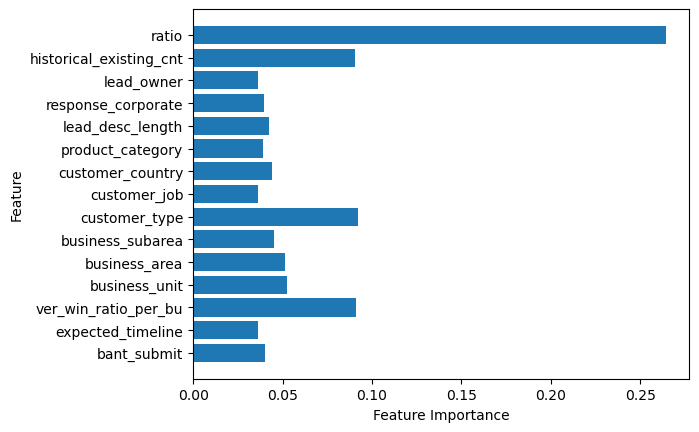

In [25]:
import matplotlib.pyplot as plt

# 피처 이름을 가져온다 (x_train에 피처 이름이 있어야 함)
feature_names = x_train.columns

# 피처 중요도를 시각화한다
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
best_model5 = grid_search9.best_estimator_
y_pred4 = best_model5.predict(x_val)
print(f1_score(y_val, y_pred4))
print(accuracy_score(y_val, y_pred4))
print(precision_score(y_val, y_pred4))
print(recall_score(y_val, y_pred4))

0.7419354838709676
0.948735244519393
0.6512667660208644
0.8619329388560157


In [30]:
test_x

,bant_submit,expected_timeline,ver_win_ratio_per_bu,business_unit,business_area,business_subarea,customer_type,customer_job,customer_country,product_category,lead_desc_length,response_corporate,lead_owner,historical_existing_cnt,ratio,is_converted
0,0.00,1,0.928573,1,8,46,0,4,5,-9,-0.763651,5,278,0.999242,0.3333,0
1,0.25,1,-1.000000,2,11,11,0,9,8,-9,-0.177648,8,437,-1.000000,0.9574,1
2,1.00,0,0.999569,1,4,33,1,12,6,35,0.363491,6,874,-1.000000,NaN,0
3,0.50,4,0.928573,1,8,4,4,6,8,-9,-0.763651,8,194,-1.000000,0.0000,0
4,1.00,0,0.972495,1,0,0,0,2,5,19,0.287701,5,167,0.771470,0.1481,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,0.50,1,-1.000000,0,1,4,4,6,5,-9,-0.532753,5,97,0.982431,0.0000,0
5267,0.25,1,-1.000000,2,1,4,4,9,8,-9,0.401726,8,438,-1.000000,0.9643,1
5268,0.75,0,-1.000000,0,1,4,1,3,5,0,-0.016954,5,97,-1.000000,0.0000,0
5269,0.00,1,-1.000000,2,1,4,0,9,8,-9,-0.763651,24,429,-1.000000,0.1429,0


In [32]:
test_x = test_x.drop(["is_converted"], axis=1)
# 테스트 데이터셋에 대한 예측 수행
y_pred = best_model5.predict(test_x)

#df_sub = pd.read_csv("../submission.csv")
#df_sub["is_converted"] = y_pred3
#df_sub.to_csv("submission0213_1.csv", index=False)
y_pred.sum() #기본 임계값

1453

In [47]:
y_pred_proba = best_model5.predict_proba(test_x)[:, 1]  
threshold = 0.03

y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
y_pred_custom_threshold.sum()

2118

In [48]:
df_check = pd.read_csv("../submission0217_2_008.csv")
sum(df_check['is_converted']==y_pred_custom_threshold)

4396

In [49]:
y_pred_custom_threshold.sum()

2118

In [44]:
df_sub = pd.read_csv("../submission.csv")
df_sub["is_converted"] = y_pred_custom_threshold
df_sub.to_csv("submission0226_1.csv", index=False)

In [55]:

from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import make_scorer, recall_score, f1_score

train_x = train_6f[var1]
test_x = test_6f[var1]

x_train, x_val, y_train, y_val = train_test_split(
    train_x.drop("is_converted", axis=1),
    train_x["is_converted"],
    test_size=0.1,
    shuffle=True,
    random_state=230,
)

xgb_clf = xgb.XGBClassifier(tree_method = "hist",  random_state=123)

param_grid = {
    'min_child_weight' : [1.1, 1.3],
    'max_depth': [5, 6],
    'learning_rate': [0.14, 0.12],
    'n_estimators': [800, 1200],
    'subsample': [0.6, 0.9],
    'alpha' : [0.8, 3],
    'lambda' : [0.5, 0.7],
    'gamma' : [0.8, 0.6],
    'scale_pos_weight' : [11.2265],
}

grid_search10 = GridSearchCV(xgb_clf, param_grid, cv=4, scoring='f1', verbose=1, n_jobs=12)
grid_search10.fit(x_train, y_train)

print("Best Parameters:", grid_search10.best_params_)
print("Best Score:", grid_search10.best_score_)


Fitting 4 folds for each of 256 candidates, totalling 1024 fits
Best Parameters: {'alpha': 3, 'gamma': 0.6, 'lambda': 0.7, 'learning_rate': 0.14, 'max_depth': 5, 'min_child_weight': 1.3, 'n_estimators': 800, 'scale_pos_weight': 11.2265, 'subsample': 0.6}
Best Score: 0.9783179067996791


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
best_model5 = grid_search10.best_estimator_
y_pred4 = best_model5.predict(x_val)
print(f1_score(y_val, y_pred4))
print(accuracy_score(y_val, y_pred4))
print(precision_score(y_val, y_pred4))
print(recall_score(y_val, y_pred4))

0.973811833171678
0.9954468802698145
0.9580152671755725
0.9901380670611439


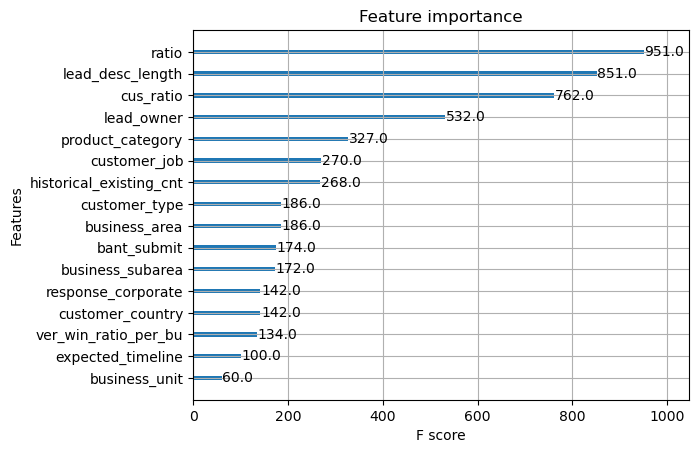

In [57]:
from xgboost import plot_importance
ax = plot_importance(best_model5)

In [58]:
test_x = test_x.drop(["is_converted"], axis=1)
# 테스트 데이터셋에 대한 예측 수행
y_pred = best_model5.predict(test_x)

#df_sub = pd.read_csv("../submission.csv")
#df_sub["is_converted"] = y_pred3
#df_sub.to_csv("submission0213_1.csv", index=False)
y_pred.sum() #기본 임계값

4388

In [64]:
y_pred_proba = best_model5.predict_proba(test_x)[:, 1]  
threshold = 0.999

y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
y_pred_custom_threshold.sum()

2816

In [80]:
train_6f.columns

Index(['bant_submit', 'customer_country', 'business_unit',
       'com_reg_ver_win_rate', 'customer_idx', 'customer_type', 'enterprise',
       'historical_existing_cnt', 'id_strategic_ver', 'it_strategic_ver',
       'idit_strategic_ver', 'customer_job', 'lead_desc_length',
       'inquiry_type', 'product_category', 'product_subcategory',
       'product_modelname', 'customer_country.1', 'customer_position',
       'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
       'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area',
       'business_subarea', 'lead_owner', 'is_converted', 'ratio'],
      dtype='object')

In [ ]:
var1 = 'bant_submit, expected_timeline, ver_win_ratio_per_bu, \
business_unit, business_area, business_subarea, customer_type, \
customer_job, customer_country, product_category, lead_desc_length, \
response_corporate, lead_owner, historical_existing_cnt, ratio, is_converted'.split(', ')

In [101]:
var2 = "bant_submit, expected_timeline, ver_win_ratio_per_bu, business_unit, \
business_area, business_subarea, customer_type, customer_job, inquiry_type, \
customer_country, product_category, lead_desc_length, response_corporate, \
lead_owner, historical_existing_cnt, com_reg_ver_win_rate, ratio, is_converted".split(', ')

In [105]:
train_6f2

,bant_submit,expected_timeline,ver_win_ratio_per_bu,business_unit,business_area,business_subarea,customer_type,customer_job,inquiry_type,customer_country,product_category,lead_desc_length,response_corporate,lead_owner,historical_existing_cnt,com_reg_ver_win_rate,ratio,is_converted
0,1.00,0,0.674311,0,0,0,0,0,0,0,0,0.123642,0,0,-1.000000,0.845419,0.0466,True
1,1.00,0,0.674311,0,0,1,0,1,0,0,0,0.255241,0,1,0.987368,0.845419,0.7500,True
2,1.00,0,0.674311,0,0,2,0,2,1,1,1,0.092850,1,2,0.999893,0.931778,0.3250,True
3,1.00,0,0.674311,0,0,3,0,3,0,1,2,0.019708,1,3,-1.000000,0.931778,0.3793,True
4,1.00,0,0.674311,0,0,4,1,4,0,1,0,0.258346,1,4,-1.000000,0.931778,0.7895,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,2,0.713653,0,12,11,0,2,1,46,2,0.473117,27,694,-1.000000,-1.000000,0.0000,False
59295,0.75,3,0.713653,0,12,4,1,3,10,9,4,0.160286,9,39,-1.000000,0.577980,0.0000,False
59296,0.75,0,0.713653,0,12,4,1,2,10,41,1,-0.058694,23,125,-1.000000,0.577980,0.0000,False
59297,1.00,4,0.713653,0,12,4,4,3,0,41,4,0.657709,23,134,-1.000000,0.577980,0.0000,False


In [102]:
train_6f1 = train_6f[var1]
train_6f2 = train_6f[var2]

test_6f1 = test_6f[var1]
test_6f2 = test_6f[var2]

test_6f1.drop('is_converted', axis=1, inplace=True)

test_6f2.drop('is_converted', axis=1, inplace=True)

C:\Users\tadje\AppData\Local\Temp\ipykernel_14616\3675537307.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_6f1.drop('is_converted', axis=1, inplace=True)
C:\Users\tadje\AppData\Local\Temp\ipykernel_14616\3675537307.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_6f2.drop('is_converted', axis=1, inplace=True)


In [107]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np


x_train, x_val, y_train, y_val = train_test_split(
    train_6f1.drop("is_converted", axis=1),
    train_6f1["is_converted"],
    test_size=0.1,
    shuffle=True,
    random_state=230
)

x_train2, x_val2, y_train2, y_val2 = train_test_split(
    train_6f2.drop("is_converted", axis=1),
    train_6f2["is_converted"],
    test_size=0.1,
    stratify = train_6f2["is_converted"],
    shuffle=True,
    random_state=230
)

M_1 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.5, scale_pos_weight=11.2265, min_split_gain = 0.42141662413744213, \
             num_leaves = 235, subsample = 0.46094625665146693, learning_rate = 0.12138964153772487, n_estimators = 1117, max_depth =7, reg_alpha = 0.6855874023008821, 
reg_lambda = 0.43767272584279693)

M_2 = xgb.XGBClassifier(random_state = 123, alpha =0.8, gamma= 0.8, reg_lambda = 0.7, learning_rate = 0.12, max_depth = 6, \
                        min_child_weight = 1.3, n_estimators = 1200, scale_pos_weight = 11.2265, subsample = 0.6)


df = pd.DataFrame()

M_1.fit(x_train2, y_train2)
y_pred_proba = M_1.predict_proba(test_6f2)[:, 1]
y_pred_custom_threshold = np.where(y_pred_proba >= 0.02, 1, 0)
df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis=1, ignore_index=True)


M_2.fit(x_train, y_train)
y_pred_proba = M_2.predict_proba(test_6f1)[:, 1]
y_pred_custom_threshold = np.where(y_pred_proba >= 0.03, 1, 0)
df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis=1, ignore_index=True)

[LightGBM] [Info] Number of positive: 4365, number of negative: 49004
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1382
[LightGBM] [Info] Number of data points in the train set: 53369, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081789 -> initscore=-2.418284
[LightGBM] [Info] Start training from score -2.418284
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [113]:
df.drop('final', axis=1, inplace=True)
df['final'] = df.apply(lambda x: 1 if (x == 1).sum() >= 2 else 0, axis=1)
#df['final'] = df.apply(lambda x: 1 if x[8] == 1 else x['final'], axis=1)
print( df['final'].sum()) 
print(sum(df_check['is_converted']==df['final']))

1662
4372


In [114]:
df_sub = pd.read_csv("../submission.csv")
df_sub["is_converted"] = df['final']
df_sub.to_csv("submission0226_2.csv", index=False)

In [ ]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

x_train, x_val, y_train, y_val = train_test_split(
    train_6f.drop("is_converted", axis=1),
    train_6f["is_converted"],
    test_size=0.1,
    shuffle=True,
    random_state=230,
    stratify=train_6f["is_converted"]
)

# Optuna 최적화 함수 정의
def objective(trial):
    param = {
        'min_split_gain': trial.suggest_float('min_split_gain', 0.3, 0.5),
        'num_leaves': trial.suggest_int('num_leaves', 128, 256),
        'subsample': trial.suggest_float('subsample', 0.4, 0.6),
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 900, 1200),
        'max_depth': trial.suggest_int('max_depth', 5, 8),
        'scale_pos_weight': 11.2265,
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 0.75),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 0.75),
        'random_state': 123,
        'boosting_type': 'dart',
        'skip_drop': 0.5
    }

    stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True)
    model = lgb.LGBMClassifier(**param)

    score = cross_val_score(model, x_train, y_train, cv=stratified_kfold, scoring='f1_macro').mean()

    #model.fit(x_train, y_train, eval_set=[(x_val, y_val)], cv=stratified_kfold)
    #preds = model.predict(x_val)
    #f1 = f1_score(y_val, preds)
    return score

# Optuna 스터디 생성 및 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, timeout=600)

# 최적의 파라미터 출력
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

In [78]:
import lightgbm as lgb
import xgboost as xgb
import numpy as np

M_1 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.5, \
                        max_depth=8, learning_rate=0.2, n_estimators=800, subsample=0.5, scale_pos_weight=11.2265)

M_2 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.4, \
                        max_depth=8, learning_rate=0.18, n_estimators=860, subsample=0.5, scale_pos_weight=11.2265)

M_3 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.5, \
                        max_depth=8, learning_rate=0.2, n_estimators=800, subsample=0.5, scale_pos_weight=11.2265)

M_6 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 6, min_child_weight = 1.3, n_estimators = 1200, scale_pos_weight = 11.2265, subsample = 0.9)

M_7 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 6, min_child_weight = 0.3, n_estimators = 800, scale_pos_weight = 11.2265, subsample = 0.9)

M_8 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 6, min_child_weight = 0.3, n_estimators = 800, scale_pos_weight = 11.2265, subsample = 0.9)
 
df = pd.DataFrame()

models_lgb = [M_1, M_2, M_3]
models_xgb = [M_6, M_7]
threshold_lgb = [0.25, 0.25, 0.2]
threshold_xgb = [0.052, 0.05]


for model, threshold in zip(models_lgb, threshold_lgb):
    model.fit(x_train_lgb, y_train)
    y_pred_proba = model.predict_proba(x_test_lgb)[:, 1]
    y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
    df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis = 1, ignore_index=True)

    
for model, threshold in zip(models_xgb, threshold_xgb):
    model.fit(x_train_xgb, y_train)
    y_pred_proba = model.predict_proba(x_test_xgb)[:, 1]
    y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
    df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis=1, ignore_index=True)





[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4343, number of negative: 49026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1031
[LightGBM] [Info] Number of data points in the train set: 53369, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081377 -> initscore=-2.423785
[LightGBM] [Info] Start training from score -2.423785
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you di

In [128]:
M_8 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 6, min_child_weight = 0.3, n_estimators = 800, scale_pos_weight = 11.2265, subsample = 0.9)
 
M_8.fit(x_train_3, y_train)
y_pred_proba = M_8.predict_proba(x_test_3)[:, 1]
y_pred_custom_threshold = np.where(y_pred_proba > 0.06, 1, 0)
df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis=1, ignore_index=True)

In [157]:
df.iloc[80:140, :]

,0,1,2,3,4,5,final
80,0,0,0,0,0,0,0
81,0,0,0,0,0,0,0
82,0,1,1,1,1,0,1
83,1,1,1,1,1,1,1
84,1,1,1,1,1,1,1
85,1,1,1,1,1,1,1
86,0,0,0,0,0,0,0
87,0,0,0,0,0,0,0
88,0,0,0,0,0,0,0
89,0,0,0,0,1,1,0


In [126]:
df.drop([5, 6, 7], axis=1, inplace=True)

In [129]:
df['final'] = df.apply(lambda x: 1 if (x == 1).sum() >= 3 else 0, axis=1)

In [130]:
df['final'].sum()

2318

In [71]:
df_check = pd.read_csv("../submission0217_2_008.csv")

In [131]:
sum(df_check['is_converted']==df['final'])

4660

In [132]:
df_sub = pd.read_csv("../submission.csv")
df_sub["is_converted"] = df['final']
df_sub.to_csv("submission0225_1.csv", index=False)  # 0.7189

In [147]:
import lightgbm as lgb
import xgboost as xgb
import numpy as np

M_1 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.5, \
                        max_depth=8, learning_rate=0.2, n_estimators=800, subsample=0.5, scale_pos_weight=11.2265)

M_2 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.4, \
                        max_depth=8, learning_rate=0.18, n_estimators=860, subsample=0.5, scale_pos_weight=11.2265)

M_3 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.5, \
                        max_depth=8, learning_rate=0.15, n_estimators=900, subsample=0.5, scale_pos_weight=11.2265)

M_6 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 6, min_child_weight = 1.3, n_estimators = 1200, scale_pos_weight = 11.2265, subsample = 0.9)

M_7 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 7, min_child_weight = 0.3, n_estimators = 1000, scale_pos_weight = 11.2265, subsample = 0.9)

M_8 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 6, min_child_weight = 0.3, n_estimators = 900, scale_pos_weight = 11.2265, subsample = 0.9)
 
df = pd.DataFrame()

models_lgb = [M_1, M_2, M_3]
models_xgb = [M_6, M_7]
threshold_lgb = [0.25, 0.25, 0.25]
threshold_xgb = [0.052, 0.06]


for model, threshold in zip(models_lgb, threshold_lgb):
    model.fit(x_train_lgb, y_train)
    y_pred_proba = model.predict_proba(x_test_lgb)[:, 1]
    y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
    df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis = 1, ignore_index=True)

    
for model, threshold in zip(models_xgb, threshold_xgb):
    model.fit(x_train_xgb, y_train)
    y_pred_proba = model.predict_proba(x_test_xgb)[:, 1]
    y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
    df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis=1, ignore_index=True)


M_8.fit(x_train_3, y_train)
y_pred_proba = M_8.predict_proba(x_test_3)[:, 1]
y_pred_custom_threshold = np.where(y_pred_proba >= 0.06, 1, 0)
df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis=1, ignore_index=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4343, number of negative: 49026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1031
[LightGBM] [Info] Number of data points in the train set: 53369, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081377 -> initscore=-2.423785
[LightGBM] [Info] Start training from score -2.423785
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you di

In [154]:
df.drop('final', axis=1, inplace=True)
df['final'] = df.apply(lambda x: 1 if (x == 1).sum() >=4  else 0, axis=1)
df['final'].sum()

2014

In [155]:
sum(df_check['is_converted']==df['final'])

4704

In [487]:
# 4752개 였던 조합
import lightgbm as lgb
import xgboost as xgb
import numpy as np

M_1 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.5, \
                        max_depth=8, learning_rate=0.2, n_estimators=800, subsample=0.5, scale_pos_weight=11.2265)

M_2 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.4, \
                        max_depth=8, learning_rate=0.18, n_estimators=860, subsample=0.5, scale_pos_weight=11.2265)

M_3 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.5, \
                        max_depth=8, learning_rate=0.15, n_estimators=900, subsample=0.5, scale_pos_weight=11.2265)

M_4 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.3, \
                        max_depth=8, learning_rate=0.15, n_estimators=900, subsample=0.7, scale_pos_weight=11.2265)


M_6 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 6, min_child_weight = 1.3, n_estimators = 1200, scale_pos_weight = 11.2265, subsample = 0.9)

M_7 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 7, min_child_weight = 0.3, n_estimators = 1000, scale_pos_weight = 11.2265, subsample = 0.9)

M_8 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.8, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 8, min_child_weight = 0.3, n_estimators = 800, scale_pos_weight = 11.2265, subsample = 0.9)

M_9 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 6, min_child_weight = 0.3, n_estimators = 900, scale_pos_weight = 11.2265, subsample = 0.8,
                       colsample_bytree = 0.5)
 
df = pd.DataFrame()

models_lgb = [M_1, M_2, M_3, M_4]
models_xgb = [M_6, M_7, M_8]
threshold_lgb = [0.25, 0.25, 0.25, 0.2]
threshold_xgb = [0.052, 0.06, 0.06]


for model, threshold in zip(models_lgb, threshold_lgb):
    model.fit(x_train_lgb, y_train)
    y_pred_proba = model.predict_proba(x_test_lgb)[:, 1]
    y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
    df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis = 1, ignore_index=True)

    
for model, threshold in zip(models_xgb, threshold_xgb):
    model.fit(x_train_xgb, y_train)
    y_pred_proba = model.predict_proba(x_test_xgb)[:, 1]
    y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
    df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis=1, ignore_index=True)


M_9.fit(x_train_3, y_train)
y_pred_proba = M_9.predict_proba(x_test_3)[:, 1]
y_pred_custom_threshold = np.where(y_pred_proba >= 0.06, 1, 0)
df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis=1, ignore_index=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4343, number of negative: 49026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1031
[LightGBM] [Info] Number of data points in the train set: 53369, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081377 -> initscore=-2.423785
[LightGBM] [Info] Start training from score -2.423785
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you di

In [514]:
df = pd.DataFrame()
threshold_lgb = [0.25, 0.2, 0.2, 0.2]
threshold_xgb = [0.052, 0.06, 0.06]
for model, threshold in zip(models_lgb, threshold_lgb):
    y_pred_proba = model.predict_proba(x_test_lgb)[:, 1]
    y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
    df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis = 1, ignore_index=True)

    
for model, threshold in zip(models_xgb, threshold_xgb):

    y_pred_proba = model.predict_proba(x_test_xgb)[:, 1]
    y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
    df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis=1, ignore_index=True)


y_pred_proba = M_9.predict_proba(x_test_3)[:, 1]
y_pred_custom_threshold = np.where(y_pred_proba >= 0.06, 1, 0)
df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis=1, ignore_index=True)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [501]:
df.head(40)

,0,1,2,3,4,5,6,7,final
0,1,1,1,1,0,0,1,1,1
1,1,1,1,1,1,1,1,1,1
2,0,1,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1
5,1,1,0,1,0,0,0,0,0
6,1,1,1,1,0,0,0,0,0
7,1,1,1,1,1,1,1,0,1
8,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1


In [515]:
#df.drop('final', axis=1, inplace=True)
df['final'] = df.apply(lambda x: 1 if (x == 1).sum() >=6  else 0, axis=1)
#df['final'] = df.apply(lambda x: 1 if x[2] == 1 else x['final'], axis=1)
df['final'].sum()

1956

In [516]:
sum(df_check['is_converted']==df['final'])

4702

In [512]:
df['final'].sum()

1923

In [517]:
df_sub = pd.read_csv("../submission.csv")
df_sub["is_converted"] = df['final']
df_sub.to_csv("submission0225_3__6개이상2True.csv", index=False)  # 

In [456]:
df.drop(3, axis=1, inplace=True)
df

,0,1,2,4,5,6,7,final
0,1,1,1,0,0,1,1,1
1,1,1,1,1,1,1,1,1
2,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
5266,0,0,0,0,0,0,0,0
5267,1,1,1,1,1,1,1,1
5268,0,0,0,0,0,0,0,0
5269,1,1,1,1,1,1,1,1


In [302]:
import lightgbm as lgb
import xgboost as xgb
import numpy as np

M_1 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.5, \
                        max_depth=8, learning_rate=0.2, n_estimators=800, subsample=0.5, scale_pos_weight=11.2265)

M_2 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.4, \
                        max_depth=8, learning_rate=0.18, n_estimators=860, subsample=0.3, scale_pos_weight=11.2265)

M_3 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.5, \
                        max_depth=8, learning_rate=0.1, n_estimators=1000, subsample=0.5, scale_pos_weight=11.2265)

M_4 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.3, \
                        max_depth=8, learning_rate=0.15, n_estimators=900, subsample=0.7, scale_pos_weight=11.2265)

M_5 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.5, \
                        max_depth=7, learning_rate=0.15, n_estimators=800, subsample=0.6, scale_pos_weight=11.2265)

M_6 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 6, min_child_weight = 1.3, n_estimators = 1200, scale_pos_weight = 11.2265, subsample = 0.9)

M_7 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 7, min_child_weight = 0.3, n_estimators = 1000, scale_pos_weight = 11.2265, subsample = 0.9)

M_8 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 3, gamma = 0.8, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 6, min_child_weight = 0.2, n_estimators = 600, scale_pos_weight = 11.2265, subsample = 0.9)

M_9 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 3, gamma = 0.5, reg_lambda = 0.7, \
                      learning_rate = 0.15, max_depth = 6, min_child_weight = 0.2, n_estimators = 650, scale_pos_weight = 11.2265, subsample = 0.9)


M_10 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 6, min_child_weight = 0.3, n_estimators = 900, scale_pos_weight = 11.2265, subsample = 0.8,
                       colsample_bytree = 0.5)
 
df = pd.DataFrame()

models_lgb = [M_1, M_2, M_3, M_4, M_5]
models_xgb = [M_6, M_7, M_8, M_9]
threshold_lgb = [0.25, 0.2, 0.2, 0.2, 0.2]
threshold_xgb = [0.052, 0.06, 0.06, 0.08]


for model, threshold in zip(models_lgb, threshold_lgb):
    model.fit(x_train_lgb, y_train)
    y_pred_proba = model.predict_proba(x_test_lgb)[:, 1]
    y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
    df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis = 1, ignore_index=True)

    
for model, threshold in zip(models_xgb, threshold_xgb):
    model.fit(x_train_xgb, y_train)
    y_pred_proba = model.predict_proba(x_test_xgb)[:, 1]
    y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
    df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis=1, ignore_index=True)


M_10.fit(x_train_3, y_train)
y_pred_proba = M_10.predict_proba(x_test_3)[:, 1]
y_pred_custom_threshold = np.where(y_pred_proba >= 0.06, 1, 0)
df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis=1, ignore_index=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4343, number of negative: 49026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1031
[LightGBM] [Info] Number of data points in the train set: 53369, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081377 -> initscore=-2.423785
[LightGBM] [Info] Start training from score -2.423785
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you di

In [317]:
df.drop('final', axis=1, inplace=True)
df['final'] = df.apply(lambda x: 1 if (x == 1).sum() >=6 else 0, axis=1)
df['final'].sum()

2202

In [318]:
sum(df_check['is_converted']==df['final'])

4742

In [362]:
df = pd.DataFrame()
models_lgb = [M_1, M_2, M_3, M_4, M_5]
models_xgb = [M_6, M_7, M_8, M_9]
threshold_lgb = [0.25, 0.25, 0.25, 0.25, 0.2]
threshold_xgb = [0.052, 0.06, 0.06, 0.08]

for model, threshold in zip(models_lgb, threshold_lgb):
    y_pred_proba = model.predict_proba(x_test_lgb)[:, 1]
    y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
    df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis = 1, ignore_index=True)

    
for model, threshold in zip(models_xgb, threshold_xgb):
    y_pred_proba = model.predict_proba(x_test_xgb)[:, 1]
    y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
    df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis=1, ignore_index=True)


y_pred_proba = M_10.predict_proba(x_test_3)[:, 1]
y_pred_custom_threshold = np.where(y_pred_proba >= 0.06, 1, 0)
df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis=1, ignore_index=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [363]:
df

,0,1,2,3,4,5,6,7,8,9
0,1,1,1,1,1,0,0,1,1,1
1,1,1,1,1,1,1,1,1,1,1
2,0,1,1,1,1,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
5266,0,0,0,0,0,0,0,0,0,0
5267,1,1,1,1,1,1,1,1,1,1
5268,0,0,0,0,0,0,0,0,0,0
5269,1,1,1,1,1,1,1,1,1,1


In [368]:
#df.drop('final', axis=1, inplace=True)
df['final'] = df.apply(lambda x: 1 if (x == 1).sum() >=5 else 0, axis=1)
df['final'].sum()

2353

In [369]:
sum(df_check['is_converted']==df['final'])

4687

In [383]:
import lightgbm as lgb
import xgboost as xgb
import numpy as np

M_1 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.5, \
                        max_depth=8, learning_rate=0.2, n_estimators=800, subsample=0.5, scale_pos_weight=11.2265)
M_2 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.5, \
                        max_depth=8, min_split_gain = 0.5, num_leaves=256, reg_alpha=0.75, learning_rate=0.2, n_estimators=1024, subsample=0.5, scale_pos_weight=11.2265)

M_6 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 6, min_child_weight = 1.3, n_estimators = 1200, scale_pos_weight = 11.2265, subsample = 0.9)

M_9 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 3, gamma = 0.5, reg_lambda = 0.7, \
                      learning_rate = 0.15, max_depth = 6, min_child_weight = 0.2, n_estimators = 600, scale_pos_weight = 11.2265, subsample = 0.9)


 
df = pd.DataFrame()

models_lgb = [M_1, M_2]
models_xgb = [M_6, M_9]
threshold_lgb = [0.25, 0.2]
threshold_xgb = [0.06, 0.08]


for model, threshold in zip(models_lgb, threshold_lgb):
    model.fit(x_train_lgb, y_train)
    y_pred_proba = model.predict_proba(x_test_lgb)[:, 1]
    y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
    df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis = 1, ignore_index=True)

    
for model, threshold in zip(models_xgb, threshold_xgb):
    model.fit(x_train_xgb, y_train)
    y_pred_proba = model.predict_proba(x_test_xgb)[:, 1]
    y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
    df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis=1, ignore_index=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4343, number of negative: 49026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1031
[LightGBM] [Info] Number of data points in the train set: 53369, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081377 -> initscore=-2.423785
[LightGBM] [Info] Start training from score -2.423785
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4343, number of

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [404]:
df.drop('final', axis=1, inplace=True)
df['final'] = df.apply(lambda x: 1 if (x == 1).sum() >= 1 else 0, axis=1)
df['final'] = df.apply(lambda x: 1 if x[1] == 1 else x['final'], axis=1)
df['final'].sum()

2495

In [405]:
sum(df_check['is_converted']==df['final'])

4621

In [407]:
import lightgbm as lgb
import xgboost as xgb
import numpy as np

M_1 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.5, \
                        max_depth=8, learning_rate=0.2, n_estimators=800, subsample=0.5, scale_pos_weight=11.2265)

M_2 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.4, \
                        max_depth=8, learning_rate=0.18, n_estimators=860, subsample=0.5, scale_pos_weight=11.2265)

M_3 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.5, \
                        max_depth=8, learning_rate=0.15, n_estimators=900, subsample=0.5, scale_pos_weight=11.2265)

M_4 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.3, \
                        max_depth=8, learning_rate=0.15, n_estimators=900, subsample=0.7, scale_pos_weight=11.2265)

M_5 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.5, \
                        max_depth=8, min_split_gain = 0.5, num_leaves=256, reg_alpha=0.75, learning_rate=0.2, n_estimators=1024, subsample=0.5, scale_pos_weight=11.2265)


M_6 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 6, min_child_weight = 1.3, n_estimators = 1200, scale_pos_weight = 11.2265, subsample = 0.9)

M_7 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 7, min_child_weight = 0.3, n_estimators = 1000, scale_pos_weight = 11.2265, subsample = 0.9)

M_8 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.8, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 8, min_child_weight = 0.3, n_estimators = 800, scale_pos_weight = 11.2265, subsample = 0.9)

M_9 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 6, min_child_weight = 1.3, n_estimators = 1200, scale_pos_weight = 11.2265, subsample = 0.9)

M_10 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 6, min_child_weight = 0.3, n_estimators = 900, scale_pos_weight = 11.2265, subsample = 0.8,
                       colsample_bytree = 0.5)
 
df = pd.DataFrame()

models_lgb = [M_1, M_2, M_3, M_4, M_5]
models_xgb = [M_6, M_7, M_8, M_9]
threshold_lgb = [0.25, 0.25, 0.25, 0.2, 0.2]
threshold_xgb = [0.052, 0.06, 0.06, 0.08]


for model, threshold in zip(models_lgb, threshold_lgb):
    model.fit(x_train_lgb, y_train)
    y_pred_proba = model.predict_proba(x_test_lgb)[:, 1]
    y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
    df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis = 1, ignore_index=True)

    
for model, threshold in zip(models_xgb, threshold_xgb):
    model.fit(x_train_xgb, y_train)
    y_pred_proba = model.predict_proba(x_test_xgb)[:, 1]
    y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
    df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis=1, ignore_index=True)


M_10.fit(x_train_3, y_train)
y_pred_proba = M_10.predict_proba(x_test_3)[:, 1]
y_pred_custom_threshold = np.where(y_pred_proba >= 0.07, 1, 0)
df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis=1, ignore_index=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4343, number of negative: 49026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1031
[LightGBM] [Info] Number of data points in the train set: 53369, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081377 -> initscore=-2.423785
[LightGBM] [Info] Start training from score -2.423785
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you di

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [408]:
df

,0,1,2,3,4,5,6,7,8,9
0,1,1,1,1,1,0,0,1,0,1
1,1,1,1,1,1,1,1,1,1,1
2,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
5266,0,0,0,0,0,0,0,0,0,0
5267,1,1,1,1,1,1,1,1,1,1
5268,0,0,0,0,0,0,0,0,0,0
5269,1,1,1,1,1,1,1,1,1,1


In [432]:
df.drop('final', axis=1, inplace=True)
df['final'] = df.apply(lambda x: 1 if (x == 1).sum() >= 5 else 0, axis=1)
#df['final'] = df.apply(lambda x: 1 if x[8] == 1 else x['final'], axis=1)
print( df['final'].sum()) 
print(sum(df_check['is_converted']==df['final']))

2238
4718


In [518]:
import lightgbm as lgb
import xgboost as xgb
import numpy as np

M_1 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.5, \
                        max_depth=8, learning_rate=0.2, n_estimators=800, subsample=0.5, scale_pos_weight=11.2265)

M_2 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.5, \
                        max_depth=8, min_split_gain = 0.5, num_leaves=256, reg_alpha=0.75, learning_rate=0.2, n_estimators=1024, subsample=0.5, scale_pos_weight=11.2265)

M_3 = lgb.LGBMClassifier(random_state=123, boosting_type='dart', skip_drop=0.5, \
                        max_depth=8, min_split_gain = 0.5, num_leaves=256, reg_alpha=0.75, learning_rate=0.2, n_estimators=1024, subsample=0.5, scale_pos_weight=11.2265)


M_6 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 6, min_child_weight = 1.3, n_estimators = 1200, scale_pos_weight = 11.2265, subsample = 0.9)

M_7 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 7, min_child_weight = 0.3, n_estimators = 1000, scale_pos_weight = 11.2265, subsample = 0.9)

M_10 = xgb.XGBClassifier(tree_method = "hist", random_state=123, alpha = 0.8, gamma = 0.5, reg_lambda = 0.4, \
                      learning_rate = 0.14, max_depth = 6, min_child_weight = 0.3, n_estimators = 900, scale_pos_weight = 11.2265, subsample = 0.8, colsample_bytree = 0.5)

df = pd.DataFrame()

models_lgb_1 = [M_1, M_2]
models_lgb_2 = [M_3]
models_xgb = [M_6, M_7]

threshold_lgb_1 = [0.25, 0.15]
threshold_lgb_2 = [0.2]
threshold_xgb = [0.052, 0.06]


for model, threshold in zip(models_lgb_1, threshold_lgb_1):
    model.fit(x_train_lgb, y_train)
    y_pred_proba = model.predict_proba(x_test_lgb)[:, 1]
    y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
    df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis = 1, ignore_index=True)

    
for model, threshold in zip(models_lgb_2, threshold_lgb_2):
    model.fit(x_train_4, y_train)
    y_pred_proba = model.predict_proba(x_test_4)[:, 1]
    y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
    df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis = 1, ignore_index=True)
 
    
for model, threshold in zip(models_xgb, threshold_xgb):
    model.fit(x_train_xgb, y_train)
    y_pred_proba = model.predict_proba(x_test_xgb)[:, 1]
    y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
    df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis=1, ignore_index=True)


M_10.fit(x_train_3, y_train)
y_pred_proba = M_10.predict_proba(x_test_3)[:, 1]
y_pred_custom_threshold = np.where(y_pred_proba >= 0.07, 1, 0)
df = pd.concat([df, pd.Series(y_pred_custom_threshold)], axis=1, ignore_index=True)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4343, number of negative: 49026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1031
[LightGBM] [Info] Number of data points in the train set: 53369, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081377 -> initscore=-2.423785
[LightGBM] [Info] Start training from score -2.423785
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4343, number of

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stop

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No furthe

In [482]:
df.head(50)

,0,1,2
0,1,1,1
1,1,1,1
2,0,0,0
3,0,0,0
4,1,1,1
5,1,0,0
6,1,1,1
7,1,1,1
8,1,1,1
9,1,1,1


In [526]:
df.drop('final', axis=1, inplace=True)
df['final'] = df.apply(lambda x: 1 if (x == 1).sum() >= 4 else 0, axis=1)
#df['final'] = df.apply(lambda x: 1 if x[8] == 1 else x['final'], axis=1)
print( df['final'].sum()) 
print(sum(df_check['is_converted']==df['final']))

1984
4714


In [527]:
df_sub = pd.read_csv("../submission.csv")
df_sub["is_converted"] = df['final']
df_sub.to_csv("submission0225_3__lgb3개2.csv", index=False) 